In [2]:
import ROOT
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from loadCfg import loadCfg
import pandas as pd
import matplotlib as mpl
from matplotlib import colors
import root_pandas as rp
pd.set_option('mode.chained_assignment',None)


plt.style.use('ggplot')
%matplotlib inline

Welcome to JupyROOT 6.08/06
{'_SET_mcprocessBranch': '"mcprocess"', '_SET_nRndRepSubset': 0, '_SET_alwaysSaveTheseEvents': '"229079"', '_SET_uniquenessTracking': '""', '_SET_kDim': 800, '_SET_emailWhenFinished': '"lng1492@gmail.com"', '_SET_fitLocationBase': '"var1Vsvar2Fit_toMain"', '_SET_saveBShistsAlso': 0, '_SET_standardizationType': '"range"', '_SET_runTag': '""', '_SET_verbose': 1, '_SET_nProcess': 26, '_SET_numberEventsToSavePerProcess': 10, '_SET_sbWeight': '"weightBS"', '_SET_nBS': 0, '_SET_runBatch': 0, '_SET_weightingScheme': '"as"', '_SET_nentries': -1, '_SET_saveBranchOfNeighbors': 1, '_SET_seedShift': 1341, '_SET_redistributeBkgSigFits': 0, '_SET_doKRandomNeighbors': 0, '_SET_varStringBase': '"cosTheta_eta_gj;phi_eta_gj;cosTheta_X_cm;Mpi0g1;Mpi0g2"', '_SET_saveMemUsage': 0, '_SET_accWeight': '"AccWeight"', '_SET_discrimVars': '"Mpi0;Meta"'}


In [3]:
configDict=loadCfg()
nentries=configDict["_SET_nentries"]
kDim=configDict["_SET_kDim"]

## Quickly checking Mpi0eta's a0/a2 speparation with and without accidental

In [15]:
# cols=["Mpi0g1","Mpi0g2","Mpi0eta","AccWeight","cosTheta_eta_gj","Mpi0","Meta","chiSq",
#      "weightASBS","weightBS","UT_bestChiWeights","UT_spectBestChiWeights","UT_equalWeights",
#      "UT_spectEqualWeights","UT_probWeights","UT_spectProbWeights"]
cols=["Mpi0g1","Mpi0g2","Mpi0eta","AccWeight","cosTheta_eta_gj","Mpi0","Meta","chiSq",
     "weightASBS","weightBS","mcprocess"]
data=rp.read_root("/d/grid13/ln16/q-values-2/allMC_trees.root",
                  "degALL_acc_mEllipse_tree_flat",
                  columns=cols)
# data=rp.read_root("/d/grid13/ln16/q-values-2/degALL_data_2017_mEllipse_pre_treeFlat_DSelector_UTweights.root",
#                   "degALL_data_2017_mEllipse_pre_tree_flat",
#                   columns=cols)

In [35]:
mcDict={0:"a0",1:"a2",2:"b1",3:"a2pi",4:"etap_to_etapipi",5:"eta_to_3pi",
        6:"f1_1285_to_etapipi",7:"omega_pi0g",8:"pipi0"}

Text(0.5,0,'Mpi0g1')

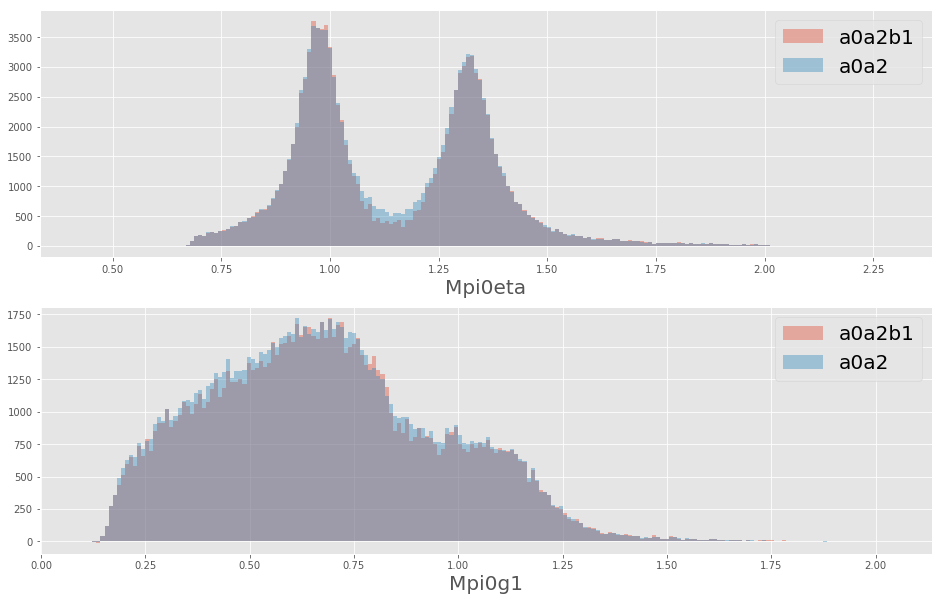

In [38]:
fig,ax=plt.subplots(2,1,figsize=(16,10))
ax=ax.flatten()
dfa0a2=data[(data.mcprocess==0)|(data.mcprocess==1)]
dfa0a2b1=data[(data.mcprocess==0)|(data.mcprocess==1)|(data.mcprocess==2)]

binedges1=np.histogram(data.Mpi0eta,bins=200)[1]
dfa0a2b1.Mpi0eta.hist(bins=binedges1,alpha=0.4,ax=ax[0],weights=dfa0a2b1.weightASBS,label="a0a2b1")
dfa0a2.Mpi0eta.hist(bins=binedges1,alpha=0.4,ax=ax[0],weights=dfa0a2.weightASBS,label="a0a2")
ax[0].legend(prop={"size":20})
ax[0].set_xlabel("Mpi0eta",size=20)
binedges2=np.histogram(data.Mpi0g1,bins=200)[1]
dfa0a2b1.Mpi0g1.hist(bins=binedges2,alpha=0.4,ax=ax[1],weights=dfa0a2b1.weightASBS, label="a0a2b1")
dfa0a2.Mpi0g1.hist(bins=binedges2,alpha=0.4,ax=ax[1],weights=dfa0a2.weightASBS, label="a0a2")
ax[1].legend(prop={"size":20})
ax[1].set_xlabel("Mpi0g1",size=20)

In [75]:
counts=data.mcprocess.value_counts()
counts.index=[mcDict[tmp] for tmp in counts.index]

In [76]:
counts

b1                    713620
a0                    228271
a2                    161234
pipi0                 151361
omega_pi0g             80414
etap_to_etapipi        35110
f1_1285_to_etapipi     12324
a2pi                    6558
eta_to_3pi              4736
Name: mcprocess, dtype: int64

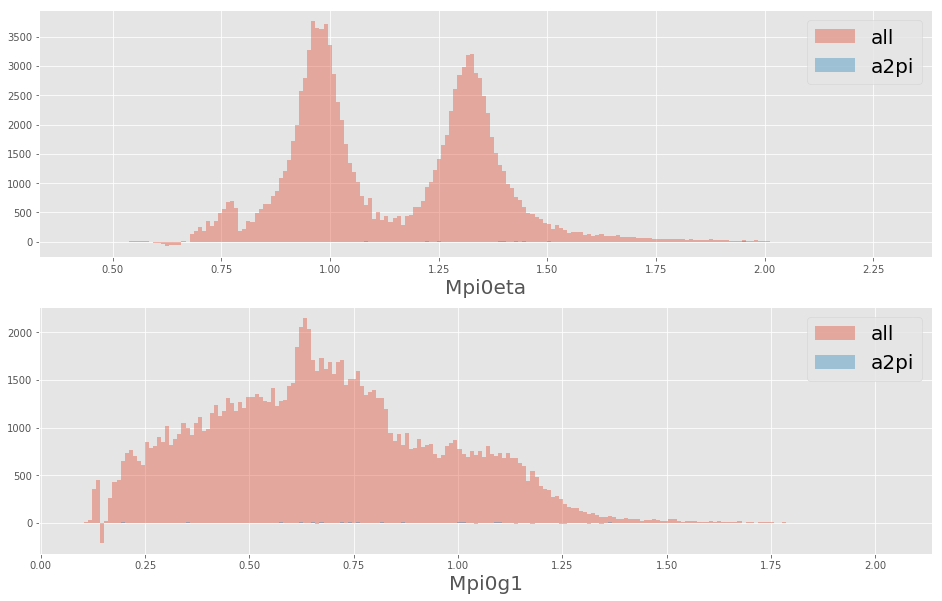

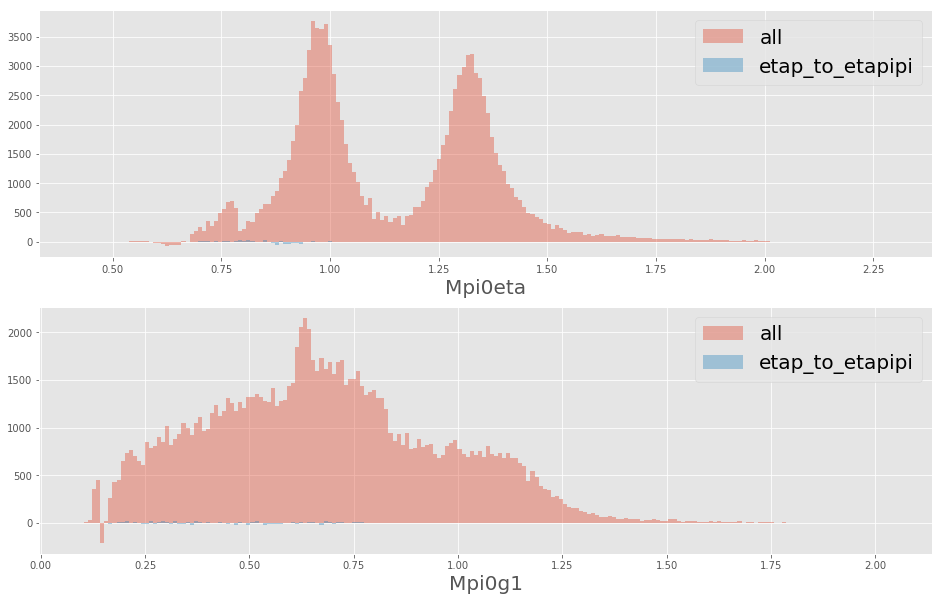

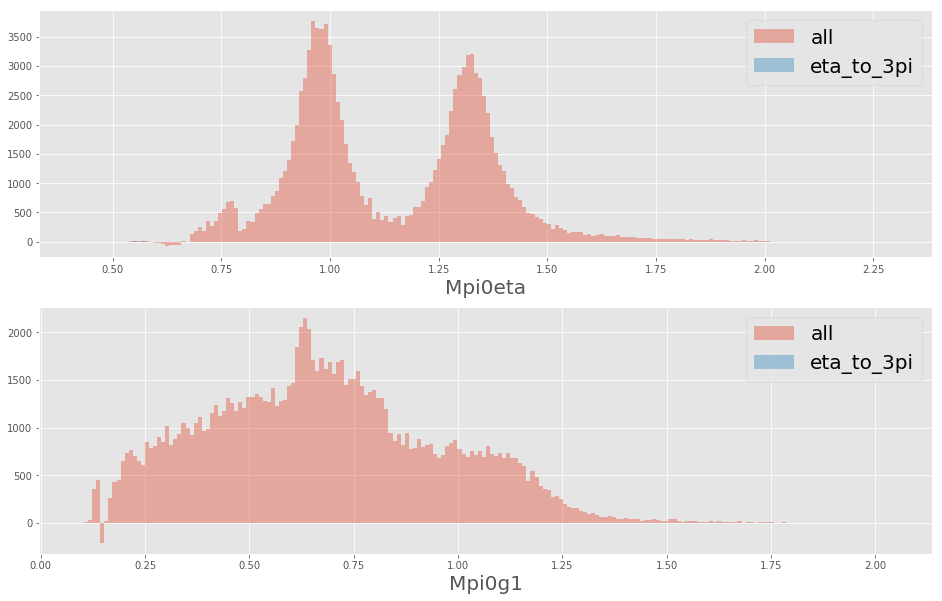

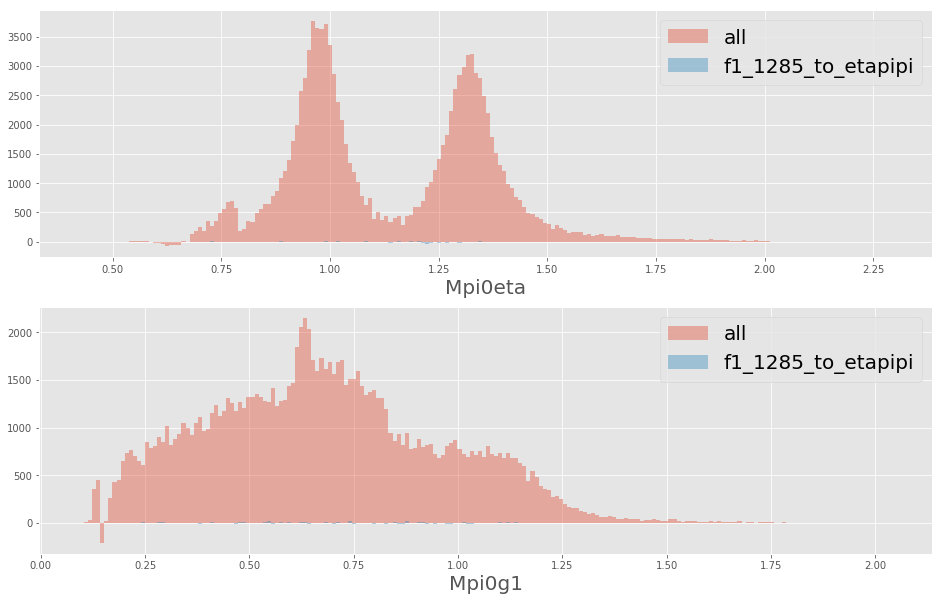

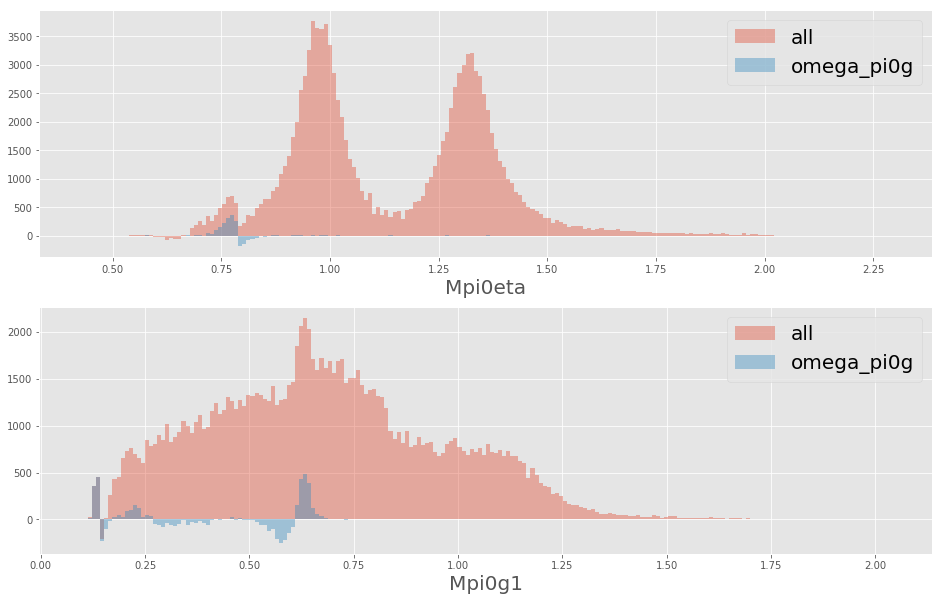

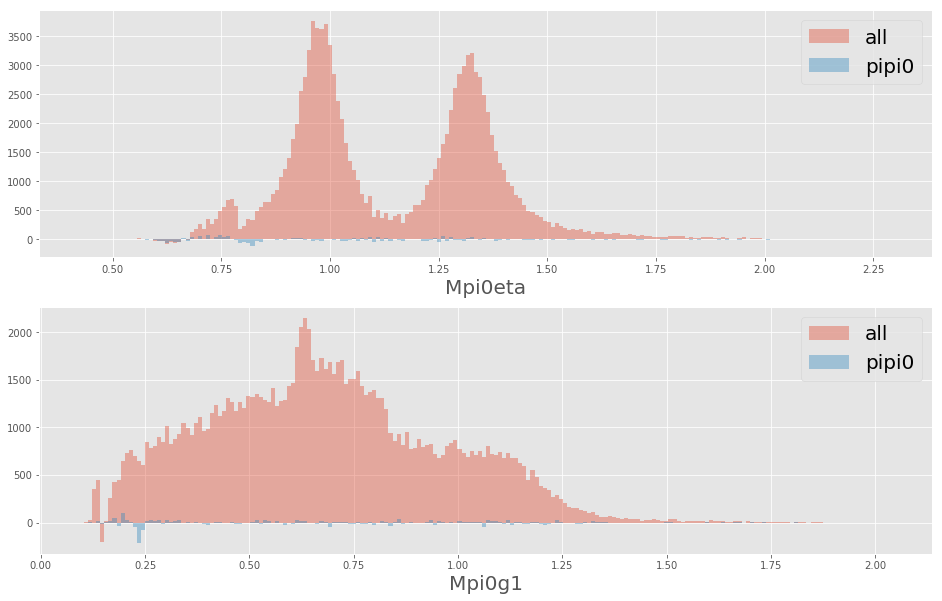

In [67]:
for i in range(3,9):
    fig,ax=plt.subplots(2,1,figsize=(16,10))
    ax=ax.flatten()
    binedges1=np.histogram(data.Mpi0eta,bins=200)[1]
    data.Mpi0eta.hist(bins=binedges1,alpha=0.4,ax=ax[0],weights=data.weightASBS,label="all")
    df=data[data.mcprocess==i]
    df.Mpi0eta.hist(bins=binedges1,alpha=0.4,ax=ax[0],weights=df.weightASBS,label=mcDict[i])
    ax[0].legend(prop={"size":20})
    ax[0].set_xlabel("Mpi0eta",size=20)
    binedges2=np.histogram(data.Mpi0g1,bins=200)[1]
    data.Mpi0g1.hist(bins=binedges2,alpha=0.4,ax=ax[1],weights=data.weightASBS, label="all")
    df.Mpi0g1.hist(bins=binedges2,alpha=0.4,ax=ax[1],weights=df.weightASBS, label=mcDict[i])
    ax[1].legend(prop={"size":20})
    ax[1].set_xlabel("Mpi0g1",size=20)

Text(0.5,1,'Weighted')

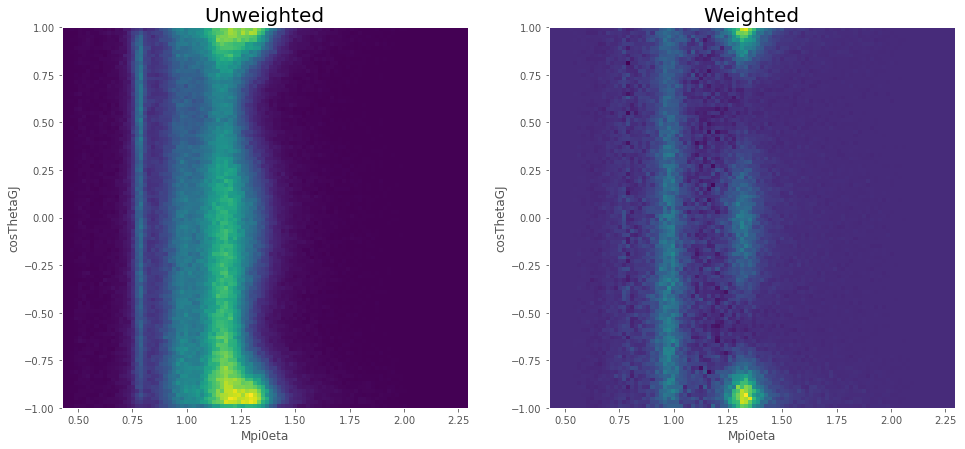

In [93]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
ax=ax.flatten()
_=ax[0].hist2d(x=data.Mpi0eta,y=data.cosTheta_eta_gj,bins=(100,100))
ax[0].grid(False)
ax[0].set_xlabel("Mpi0eta")
ax[0].set_ylabel("cosThetaGJ")
ax[0].set_title("Unweighted",size=20)
_=ax[1].hist2d(x=data.Mpi0eta,y=data.cosTheta_eta_gj,weights=data.weightASBS,bins=(100,100))
ax[1].grid(False)
ax[1].set_xlabel("Mpi0eta")
ax[1].set_ylabel("cosThetaGJ")
ax[1].set_title("Weighted",size=20)

## Look at the reconstructed vs input signal yields to determine biases

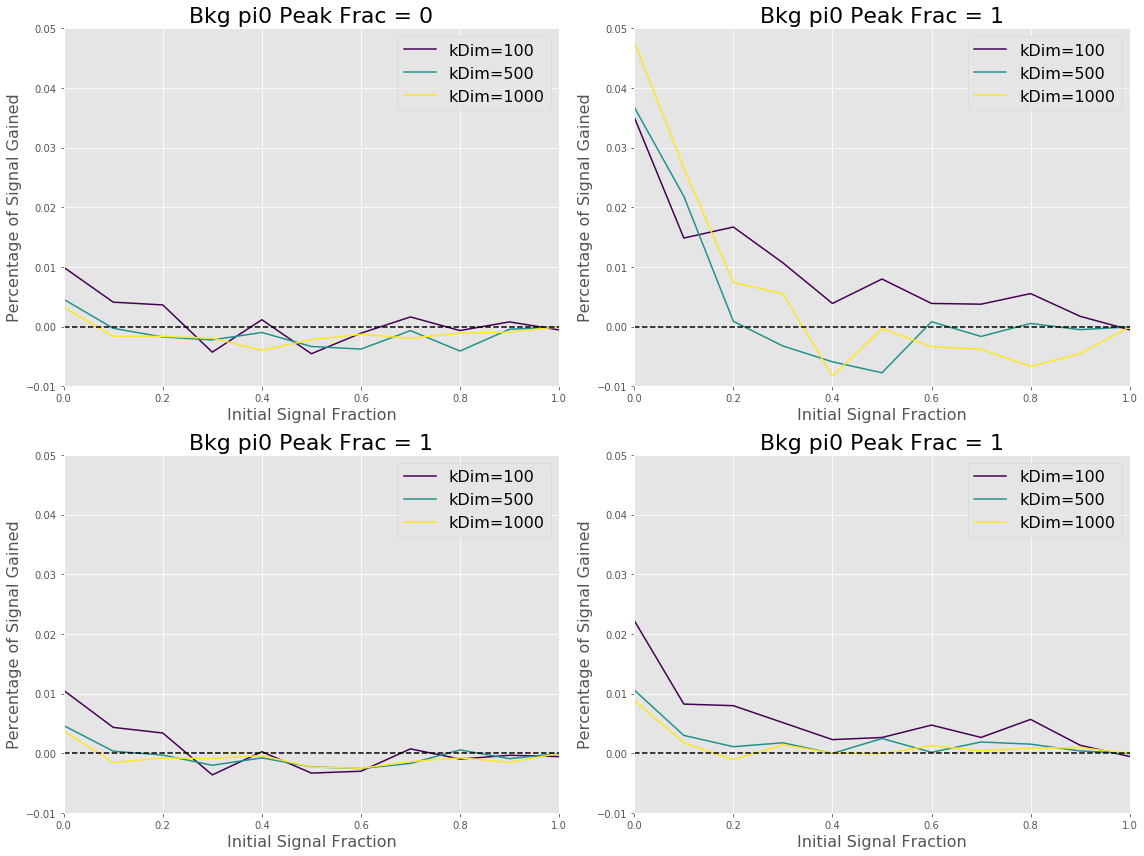

In [9]:
fig,axes=plt.subplots(2,2,figsize=(16,12))
axes=axes.flatten()

log=pd.read_csv("checkGausFeedThrough/logBias_NoBkgPeak.txt",delimiter=" ")
log["DeltaSig"]=(log.outputTotalSig-log.inputTotalSig)/log.totalEvnts
interesting_kDims=[100,500,1000]#log.kDim.unique()
cmap = mpl.cm.get_cmap('viridis')
colors=[cmap(val) for val in np.linspace(0,1,len(interesting_kDims))]
ylims=(-0.01,0.05)
for i,kDim in enumerate(interesting_kDims):
    log[log.kDim==kDim].sort_values("initSigFrac").plot(kind="line",c=colors[i],
        x="initSigFrac",y="DeltaSig",label="kDim="+str(kDim),ax=axes[0])
axes[0].legend(prop={"size":16})
axes[0].axhline(0,c='black',linestyle='--')
axes[0].set_ylabel("Percentage of Signal Gained",size=16)
axes[0].set_xlabel("Initial Signal Fraction",size=16)
axes[0].set_title("Bkg pi0 Peak Frac = 0",size=22)
axes[0].set_ylim(ylims)

log=pd.read_csv("checkGausFeedThrough/logBias_AllBkgPeak.txt",delimiter=" ")
log["DeltaSig"]=(log.outputTotalSig-log.inputTotalSig)/log.totalEvnts
for i,kDim in enumerate(interesting_kDims):
    log[log.kDim==kDim].sort_values("initSigFrac").plot(kind="line",c=colors[i],
        x="initSigFrac",y="DeltaSig",label="kDim="+str(kDim),ax=axes[1])
axes[1].legend(prop={"size":16})
axes[1].axhline(0,c='black',linestyle='--')
axes[1].set_ylabel("Percentage of Signal Gained",size=16)
axes[1].set_xlabel("Initial Signal Fraction",size=16)
axes[1].set_title("Bkg pi0 Peak Frac = 1",size=22)
axes[1].set_ylim(ylims)

log=pd.read_csv("checkGausFeedThrough/logBias_NoBkgPeak_Minos.txt",delimiter=" ")
log["DeltaSig"]=(log.outputTotalSig-log.inputTotalSig)/log.totalEvnts
for i,kDim in enumerate(interesting_kDims):
    log[log.kDim==kDim].sort_values("initSigFrac").plot(kind="line",c=colors[i],
        x="initSigFrac",y="DeltaSig",label="kDim="+str(kDim),ax=axes[2])
axes[2].legend(prop={"size":16})
axes[2].axhline(0,c='black',linestyle='--')
axes[2].set_ylabel("Percentage of Signal Gained",size=16)
axes[2].set_xlabel("Initial Signal Fraction",size=16)
axes[2].set_title("Bkg pi0 Peak Frac = 1",size=22)
axes[2].set_ylim(ylims)

log=pd.read_csv("checkGausFeedThrough/logBias_AllBkgPeak_Minos.txt",delimiter=" ")
log["DeltaSig"]=(log.outputTotalSig-log.inputTotalSig)/log.totalEvnts
for i,kDim in enumerate(interesting_kDims):
    log[log.kDim==kDim].sort_values("initSigFrac").plot(kind="line",c=colors[i],
        x="initSigFrac",y="DeltaSig",label="kDim="+str(kDim),ax=axes[3])
axes[3].legend(prop={"size":16})
axes[3].axhline(0,c='black',linestyle='--')
axes[3].set_ylabel("Percentage of Signal Gained",size=16)
axes[3].set_xlabel("Initial Signal Fraction",size=16)
axes[3].set_title("Bkg pi0 Peak Frac = 1",size=22)
axes[3].set_ylim(ylims)

plt.tight_layout()

## Loading the data

In [10]:
# #dataFile=ROOT.TFile.Open("results_500k_pi0Bkg_14/diagnosticPlots/postQVal_flatTree.root")
# dataFile=ROOT.TFile.Open("logs/postQVal_flatTree.root")
# dataTree=dataFile.degALL_acc_mEllipse_tree_flat

# if nentries==-1:
#     nentries=dataTree.GetEntries()

# qvalues=np.zeros(nentries)
# NLLBests=np.zeros(nentries)
# NLLWorsts=np.zeros(nentries)
# worst_qvalues=np.zeros(nentries)
# eff_nentrieses=np.zeros(nentries)
# Mpi0g1s=np.zeros(nentries)
# Mpi0etas=np.zeros(nentries)
# Mpi0s=np.zeros(nentries)
# Metas=np.zeros(nentries)
# AccWeights=np.zeros(nentries)
# mcprocesses=np.zeros(nentries)
# weightBSs=np.zeros(nentries)
# cosTheta_eta_gjs=np.zeros(nentries)
# chiSqs=np.zeros(nentries)
# nn0s=np.zeros(nentries)
# nn1s=np.zeros(nentries)
# for ientry in range(nentries):
#     if ientry%1000==0:
#         print("loading event: "+str(ientry))
#     dataTree.GetEntry(ientry)
#     qvalues[ientry]=dataTree.qvalue
#     NLLBests[ientry]=dataTree.qvalue_NLLBest
#     NLLWorsts[ientry]=dataTree.qvalue_NLLWorst
#     worst_qvalues[ientry]=dataTree.worst_qvalue
#     eff_nentrieses[ientry]=dataTree.eff_nentries
#     Mpi0g1s[ientry]=dataTree.Mpi0g1
#     Mpi0s[ientry]=dataTree.Mpi0
#     Metas[ientry]=dataTree.Meta
#     Mpi0etas[ientry]=dataTree.Mpi0eta
#     AccWeights[ientry]=dataTree.AccWeight
#     mcprocesses[ientry]=dataTree.mcprocess
#     weightBSs[ientry]=dataTree.weightBS
#     cosTheta_eta_gjs[ientry]=dataTree.cosTheta_eta_gj
#     chiSqs[ientry]=dataTree.chiSq
#     nn0s[ientry]=dataTree.nn0
#     nn1s[ientry]=dataTree.nn1
# data=pd.DataFrame([qvalues,NLLBests,NLLWorsts,worst_qvalues,eff_nentrieses,Mpi0g1s,Mpi0etas,
#                   AccWeights,mcprocesses,weightBSs,cosTheta_eta_gjs,Mpi0s,Metas,
#                   chiSqs,nn0s,nn1s]).T
# data.columns=["qvalues","NLLBests","NLLWorsts","worst_qvalues","eff_nentrieses","Mpi0g1s","Mpi0etas",
#              "AccWeight","mcprocess","weightBS","cosTheta_eta_gj","Mpi0","Meta","chiSq","nn0","nn1"]

In [13]:
cols=["qvalue","NLLBest","NLLWorst","worst_qvalue","eff_nentries","Mpi0g1","Mpi0eta",
             "AccWeight","mcprocess","weightBS","cosTheta_eta_gj","Mpi0","Meta","chiSq","nn0","nn1",
     "weightASBS"]
pis=["px","py","pz","e"]
for gi in range(1,5):
    for pi in pis:
        cols=cols+["g"+str(gi)+"_p4_kin_"+pi]
data=rp.read_root("results_500k_correctSB_21/logs/allMC_trees_lorentz.root","degALL_acc_mEllipse_tree_flat",columns=cols)

ValueError: Pattern 'mcprocess' didn't match any branch

## Plotting the incorrect photon combination's mass distribution

In [36]:
def calculateMass(df,i,j):
    de=df["g"+str(i)+"_p4_kin_e"]+df["g"+str(j)+"_p4_kin_e"]
    dpx=df["g"+str(i)+"_p4_kin_px"]+df["g"+str(j)+"_p4_kin_px"]
    dpy=df["g"+str(i)+"_p4_kin_py"]+df["g"+str(j)+"_p4_kin_py"]
    dpz=df["g"+str(i)+"_p4_kin_pz"]+df["g"+str(j)+"_p4_kin_pz"]
    return np.sqrt(de**2-(dpx**2+dpy**2+dpz**2))

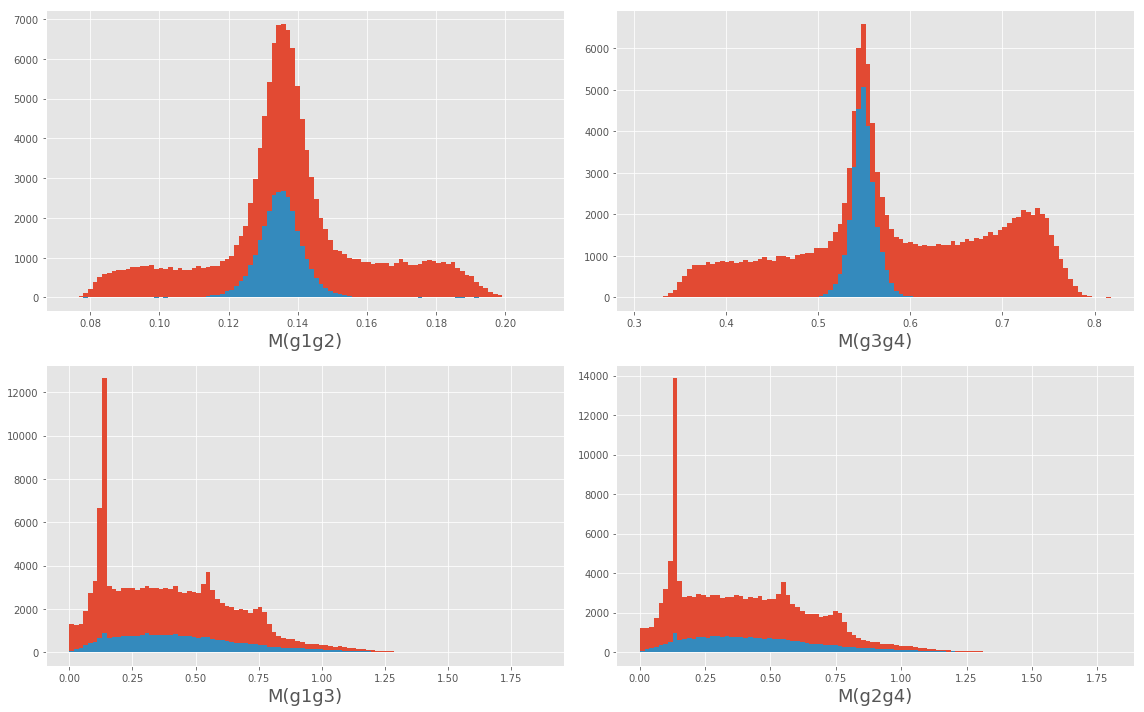

In [37]:
fig,ax=plt.subplots(2,2,figsize=(16,10))
ax=ax.flatten()
ax[0].set_xlabel("M(g1g2)",size=18)
ax[1].set_xlabel("M(g3g4)",size=18)
ax[2].set_xlabel("M(g1g3)",size=18)
ax[3].set_xlabel("M(g2g4)",size=18)
df=data
calculateMass(df,1,2).hist(bins=100,ax=ax[0],weights=df.AccWeight)
calculateMass(df,3,4).hist(bins=100,ax=ax[1],weights=df.AccWeight)
calculateMass(df,1,3).hist(bins=100,ax=ax[2],weights=df.AccWeight)
calculateMass(df,2,4).hist(bins=100,ax=ax[3],weights=df.AccWeight)
calculateMass(df,1,2).hist(bins=100,ax=ax[0],weights=df.AccWeight*df.qvalue)
calculateMass(df,3,4).hist(bins=100,ax=ax[1],weights=df.AccWeight*df.qvalue)
calculateMass(df,1,3).hist(bins=100,ax=ax[2],weights=df.AccWeight*df.qvalue)
calculateMass(df,2,4).hist(bins=100,ax=ax[3],weights=df.AccWeight*df.qvalue)
plt.tight_layout()

/d/home/ln16/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/d/home/ln16/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


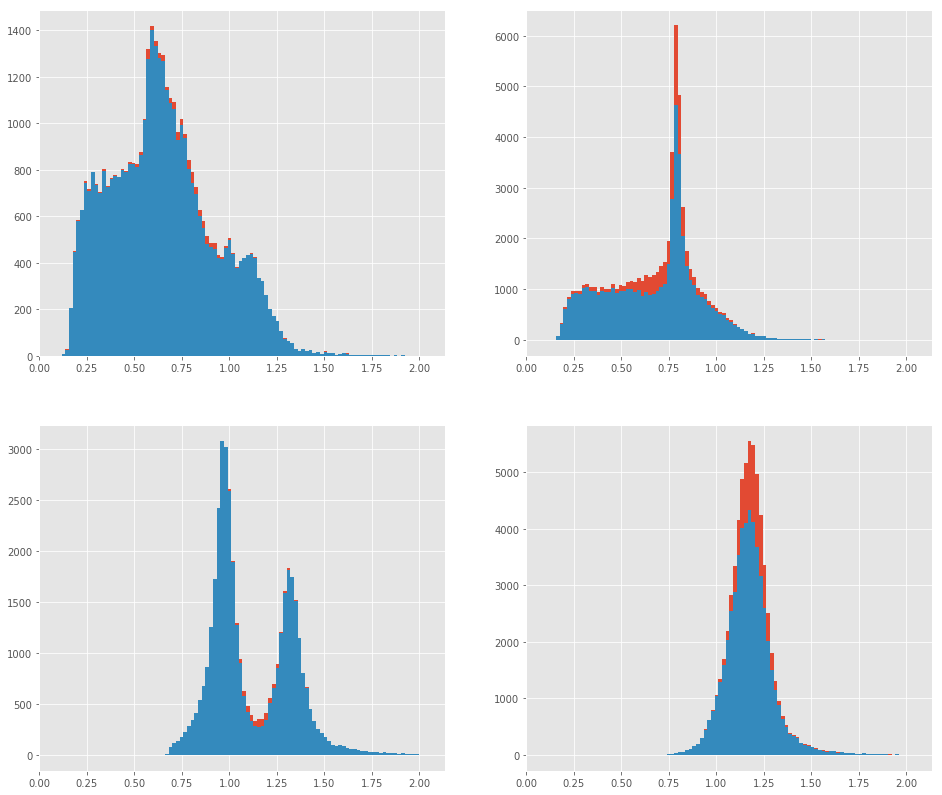

In [38]:
fig,ax=plt.subplots(2,2,figsize=(16,14))
ax=ax.flatten()

binedges1=np.histogram(data.Mpi0eta,bins=100)[1]
binedges2=np.histogram(data.Mpi0g1,bins=100)[1]

df1=data[(data.mcprocess==0)|(data.mcprocess==1)]
df2=data[data.mcprocess==2]
_=ax[0].hist(df1.Mpi0g1,weights=df1.AccWeight,bins=binedges2)
_=ax[1].hist(df2.Mpi0g1,weights=df2.AccWeight,bins=binedges2)
_=ax[2].hist(df1.Mpi0eta,weights=df1.AccWeight,bins=binedges2)
_=ax[3].hist(df2.Mpi0eta,weights=df2.AccWeight,bins=binedges2)
df1=df1[data.nn1<0.9]
df2=df2[data.nn1<0.9]
_=ax[0].hist(df1.Mpi0g1,weights=df1.AccWeight,bins=binedges2)
_=ax[1].hist(df2.Mpi0g1,weights=df2.AccWeight,bins=binedges2)
_=ax[2].hist(df1.Mpi0eta,weights=df1.AccWeight,bins=binedges2)
_=ax[3].hist(df2.Mpi0eta,weights=df2.AccWeight,bins=binedges2)

## Quickly check what Mpi0g vs Mpi0 looks like

Text(0.5,1,'a0/a2 MC')

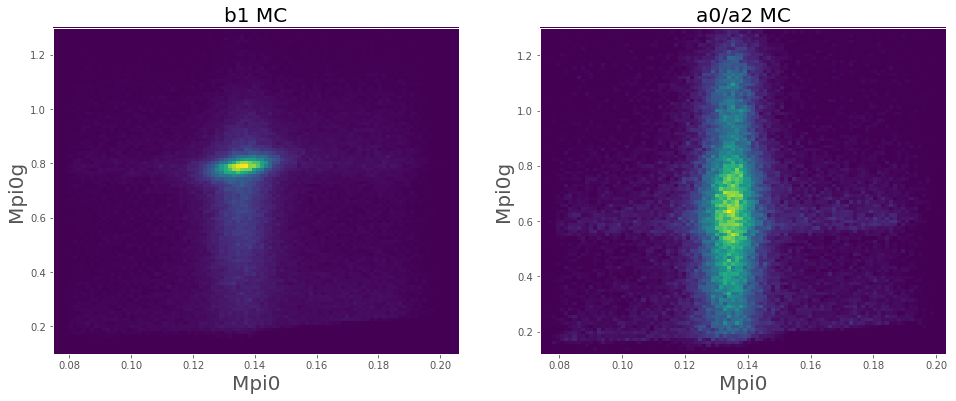

In [41]:
fig,ax=plt.subplots(1,2,figsize=(16,6))
df=data[(data.Mpi0g1<1.3)&(data.mcprocess==2)]
ax[0].hist2d(df.Mpi0,df.Mpi0g1,bins=(100,100))#,norm=mpl.colors.LogNorm())
ax[0].grid(False)
ax[0].set_xlabel("Mpi0",size=20)
ax[0].set_ylabel("Mpi0g",size=20)
ax[0].set_title("b1 MC",size=20)
df=data[(data.Mpi0g1<1.3)&(data.mcprocess.isin([0,1]))]
ax[1].hist2d(df.Mpi0,df.Mpi0g1,bins=(100,100))#,norm=mpl.colors.LogNorm())
ax[1].grid(False)
ax[1].set_xlabel("Mpi0",size=20)
ax[1].set_ylabel("Mpi0g",size=20)
ax[1].set_title("a0/a2 MC",size=20)

## Measuring how much omegas are removed

Text(0.5,1,'Integral of Gaus: 12154.8531316')

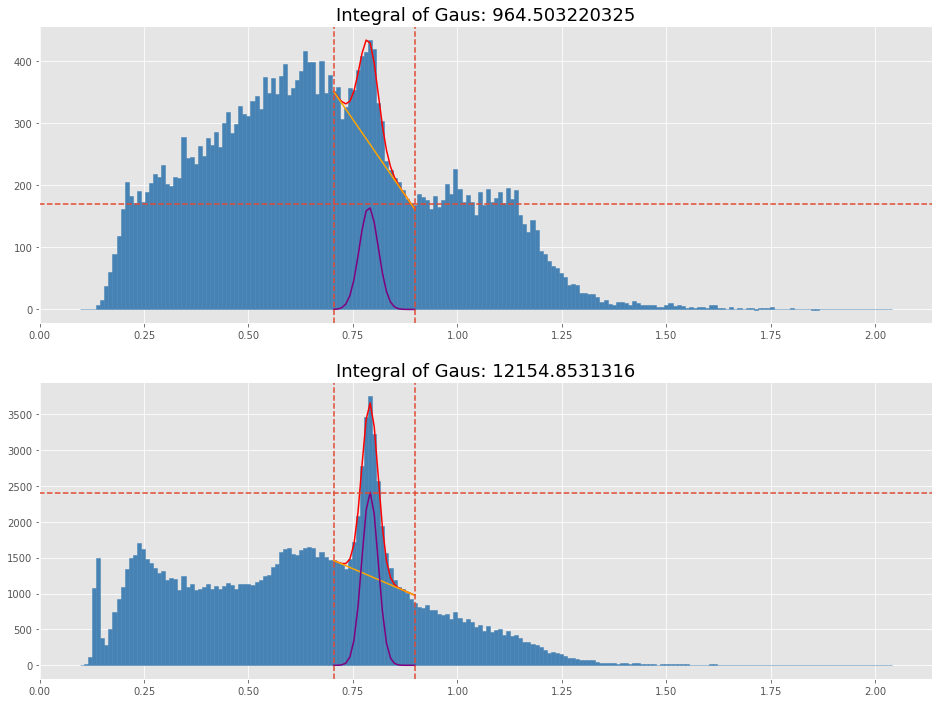

In [42]:
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)
def linear(x,m,b):
    return m*x+b
def fitFunc(x, mean, amplitude, standard_deviation, m, b):
    return gaussian(x,mean,amplitude,standard_deviation)+linear(x,m,b)

from scipy.optimize import curve_fit
import scipy 
nBins=200
fig,axes= plt.subplots(2,1,figsize=(16,12))

######################
# Get plots for the dataset with q-values applied
######################
counts,edges=np.histogram(data.Mpi0g1,bins=nBins,weights=data.AccWeight*data.qvalue)
centers=edges[1:]-(edges[1:]-edges[:-1])/2
binWidth=edges[1]-edges[0]
fitLocs = (centers>0.7)*(centers<0.9)
xLocs = centers[fitLocs]
yLocs = counts[fitLocs]

popt, _ = curve_fit(fitFunc, xLocs, yLocs, p0=[0.8, 1000, 0.05, 5000, 1000])

dHist_Mpi0g1=axes[0].hist(data.Mpi0g1,bins=nBins,weights=data.AccWeight*data.qvalue,
                      edgecolor='steelblue',facecolor='steelblue')
axes[0].plot(xLocs, fitFunc(xLocs, *popt), label='fit', c='red')
axes[0].plot(xLocs, linear(xLocs,*popt[3:]), label='bkg', c='orange')
axes[0].plot(xLocs, gaussian(xLocs,*popt[:-2]), label='bkg', c='purple')

yheight=170
axes[0].axhline(yheight,linestyle="--")
axes[0].axvline(xLocs[-1],linestyle="--")
axes[0].axvline(xLocs[0],linestyle="--")
areaRect=yheight*(xLocs[-1]-xLocs[0])
intGaus=scipy.integrate.simps(gaussian(xLocs,*popt[:-2]),xLocs)
intGaus/=binWidth
axes[0].set_title("Integral of Gaus: {0}".format(intGaus),size=18)


######################
# Get plots for the dataset without q-values applied
######################
counts,edges=np.histogram(data.Mpi0g1,bins=nBins,weights=data.AccWeight)
centers=edges[1:]-(edges[1:]-edges[:-1])/2
fitLocs = (centers>0.7)*(centers<0.9)
xLocs = centers[fitLocs]
yLocs = counts[fitLocs]

popt, _ = curve_fit(fitFunc, xLocs, yLocs, p0=[0.8, 1000, 0.05, 5000, 1000])

dHist_Mpi0g1=axes[1].hist(data.Mpi0g1,bins=nBins,weights=data.AccWeight,
                      edgecolor='steelblue',facecolor='steelblue')
axes[1].plot(xLocs, fitFunc(xLocs, *popt), label='fit', c='red')
axes[1].plot(xLocs, linear(xLocs,*popt[3:]), label='bkg', c='orange')
axes[1].plot(xLocs, gaussian(xLocs,*popt[:-2]), label='bkg', c='purple')

yheight=2400
axes[1].axhline(yheight,linestyle="--")
axes[1].axvline(xLocs[-1],linestyle="--")
axes[1].axvline(xLocs[0],linestyle="--")
areaRect=yheight*(xLocs[-1]-xLocs[0])
intGaus=scipy.integrate.simps(gaussian(xLocs,*popt[:-2]),xLocs)
intGaus/=binWidth
axes[1].set_title("Integral of Gaus: {0}".format(intGaus),size=18)

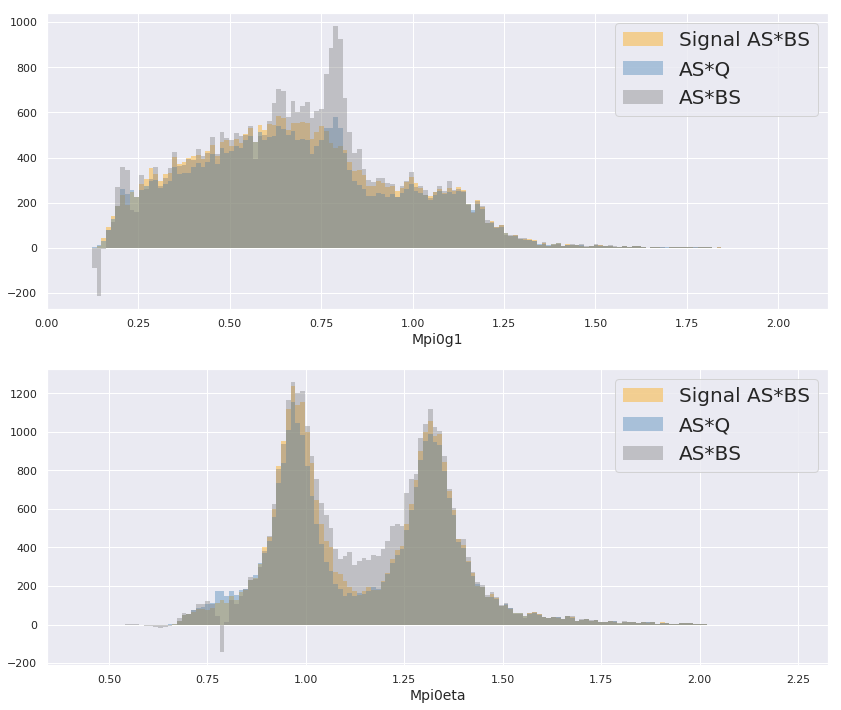

In [44]:
fig,axes=plt.subplots(2,1,figsize=(14,12))
sns.set()

def colorAlpha(color,alpha):
    color=colors.to_rgba(color)
    color=list(color)
    color[3]=alpha
    return color

varsToPlot=["Mpi0g1","Mpi0eta"]

for i, varToPlot in enumerate(varsToPlot):
    binedges=np.histogram(data[varToPlot],bins=150)[1]
    dataSig=data[(data.mcprocess==0)|(data.mcprocess==1)]
    _ = axes[i].hist(dataSig[varToPlot],bins=binedges,weights=dataSig.AccWeight*dataSig.weightBS,
                          edgecolor=colorAlpha('orange',0),facecolor=colorAlpha('orange',0.4),label="Signal AS*BS")

    _ = axes[i].hist(data[varToPlot],bins=binedges,weights=data.AccWeight*data.qvalue,
                          edgecolor=colorAlpha('steelblue',0),facecolor=colorAlpha('steelblue',0.4),label="AS*Q")

    _ = axes[i].hist(data[varToPlot],bins=binedges,weights=data.AccWeight*data.weightBS,
                          edgecolor=colorAlpha('gray',0),facecolor=colorAlpha('gray',0.4),label="AS*BS")
    axes[i].legend(prop={"size":20})
    axes[i].set_xlabel(varToPlot,size=14)



## What does this mean for the a0 and a2

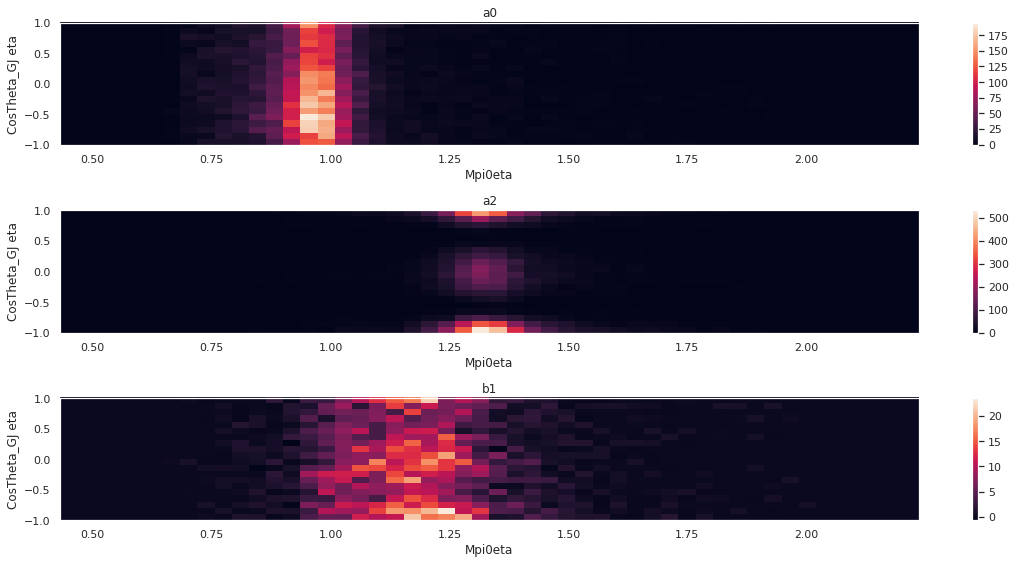

In [45]:
fig,axes=plt.subplots(3,1,figsize=(16,8))
axes=axes.flatten()

counts, xedges, yedges = np.histogram2d(x=data.Mpi0eta,y=data.cosTheta_eta_gj,bins=(50,20))
def plotGJ(df,ax,lab,xedges,yedges,includeQ):
    if includeQ:
        h=ax.hist2d(x=df.Mpi0eta,y=df.cosTheta_eta_gj,weights=df.AccWeight*df.qvalue,bins=(xedges,yedges))
    else:
        h=ax.hist2d(x=df.Mpi0eta,y=df.cosTheta_eta_gj,weights=df.AccWeight,bins=(xedges,yedges))
    ax.grid(False)
    ax.set_title(lab)
    ax.set_ylabel("CosTheta_GJ eta")
    ax.set_xlabel("Mpi0eta")
    plt.colorbar(h[3],ax=ax)
plotGJ(data[data.mcprocess==0],axes[0],"a0",xedges,yedges,True)
plotGJ(data[data.mcprocess==1],axes[1],"a2",xedges,yedges,True)
plotGJ(data[data.mcprocess==2],axes[2],"b1",xedges,yedges,True)
plt.tight_layout()

## Was going to check distribution of Q-values/Meta/Mpi0 by doing a sideband subtraction of Mpi0g1 but I dont think I learn anything

sbWeight: 1.5


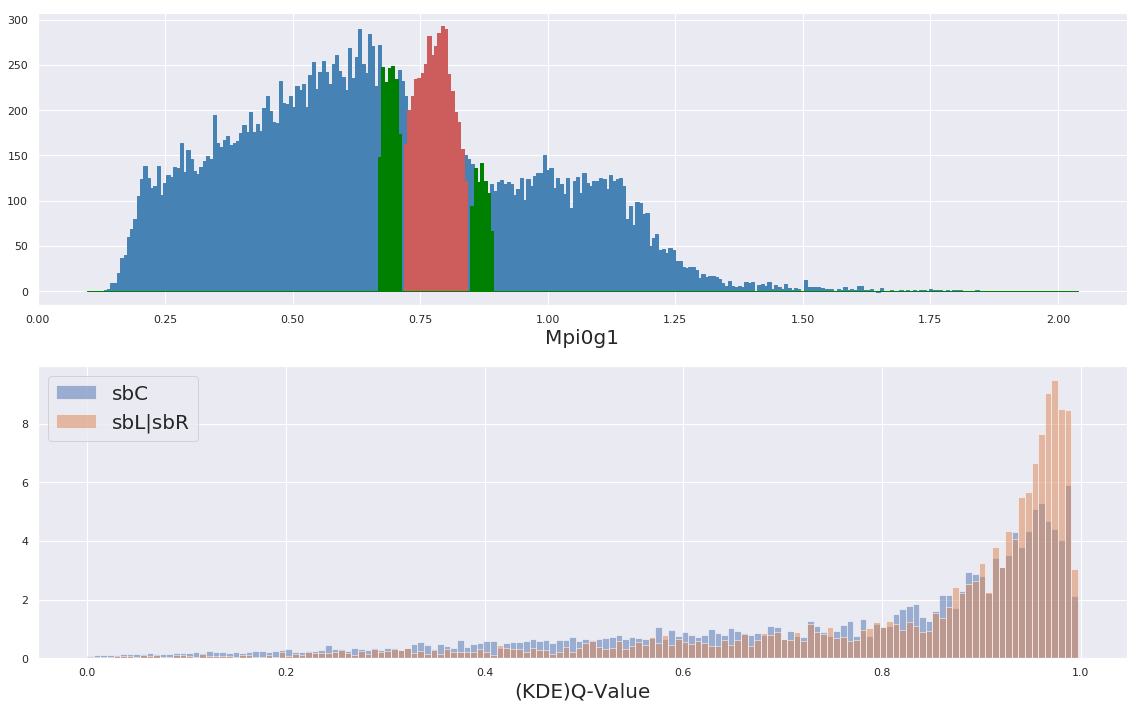

In [50]:
fig,axes=plt.subplots(2,1,figsize=(16,10))
axes=axes.flatten()
_,binedges=np.histogram(data.Mpi0g1,bins=300)
dHist_Mpi0g1=axes[0].hist(data.Mpi0g1,bins=binedges,weights=data.AccWeight*data.qvalue,
                      edgecolor='steelblue',facecolor='steelblue')

center=0.78
sbLL=0.67
sbLM=0.71
sbLR=0.72
sbRL=0.84
sbRM=0.85
sbRR=0.89
sbC=(data.Mpi0g1>sbLR)*(data.Mpi0g1<sbRL)
sbR=(data.Mpi0g1<sbRR)*(data.Mpi0g1>sbRM)
sbL=(data.Mpi0g1<sbLM)*(data.Mpi0g1>sbLL)


dHist_Mpi0g1=axes[0].hist(data[sbC].Mpi0g1,bins=binedges,weights=data[sbC].AccWeight*data[sbC].qvalue,
                      edgecolor='indianred',facecolor='indianred')
dHist_Mpi0g1=axes[0].hist(data[sbR].Mpi0g1,bins=binedges,weights=data[sbR].AccWeight*data[sbR].qvalue,
                      edgecolor='green',facecolor='green')
dHist_Mpi0g1=axes[0].hist(data[sbL].Mpi0g1,bins=binedges,weights=data[sbL].AccWeight*data[sbL].qvalue,
                      edgecolor='green',facecolor='green')
axes[0].set_xlabel("Mpi0g1",size=20)



sbWeight=((sbRL-center)+(center-sbLR))/((sbRR-sbRM)+(sbLM-sbLL))
print("sbWeight: {0}".format(sbWeight))

# axes[0].axvline(center,c='black',linestyle='--')
# axes[0].axvline(sbLL,c='black',linestyle='--')
# axes[0].axvline(sbLM,c='black',linestyle='--')
# axes[0].axvline(sbLR,c='black',linestyle='--')
# axes[0].axvline(sbRL,c='black',linestyle='--')
# axes[0].axvline(sbRM,c='black',linestyle='--')
# axes[0].axvline(sbRR,c='black',linestyle='--')

# ----------------------------------------
df=data[sbC | sbR | sbL]
df['omegaSB']=0
df.omegaSB.loc[sbR]=-sbWeight
df.omegaSB.loc[sbL]=-sbWeight
df.omegaSB.loc[sbC]=1

counts,binedges=np.histogram(data[sbC].qvalue,bins=150)
data[sbC].qvalue.hist(bins=binedges,weights=data[sbC].AccWeight*data[sbC].qvalue,
                       ax=axes[1],density=True,label="sbC",alpha=0.5)
data[sbL|sbR].qvalue.hist(bins=binedges,weights=data[sbL|sbR].AccWeight*data[sbL|sbR].qvalue,
                           ax=axes[1],density=True,label="sbL|sbR",alpha=0.5)
axes[1].legend(prop={'size':20})
axes[1].set_xlabel("(KDE)Q-Value",size=20)

plt.tight_layout()

## Looking at GJ vs Mpi0eta in Data

In [292]:
cols=["Mpi0g1","Mpi0g2","Mpi0eta","AccWeight","cosTheta_eta_gj","Mpi0","Meta","chiSq",
     "weightASBS","weightBS","Mpi0p","Metap","vanHove_omega","mandelstam_tp","mandelstam_teta","phi_eta_gj",
          "cosTheta_X_cm","phi_X_cm","vanHove_x","vanHove_y","vanHove_omega"]


data2017=rp.read_root("/d/grid15/ln16/pi0eta/092419/degALL_data_2017_mEllipse_pre_treeFlat_DSelector.root",
                  columns=cols)

Text(0.5,1,'Integral of Gaus: 13621.3702278')

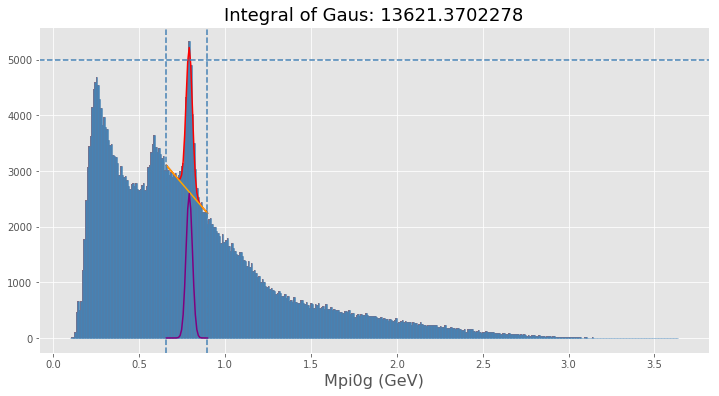

In [293]:
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)
def linear(x,m,b):
    return m*x+b
def fitFunc(x, mean, amplitude, standard_deviation, m, b):
    return gaussian(x,mean,amplitude,standard_deviation)+linear(x,m,b)

from scipy.optimize import curve_fit
import scipy 

nBins=400
weightCol="AccWeight"

counts,edges=np.histogram(data2017.Mpi0g1,bins=nBins,weights=data2017[weightCol])
centers=edges[1:]-(edges[1:]-edges[:-1])/2
binWidth=edges[1]-edges[0]
fitLocs = (centers>0.65)*(centers<0.9)
xLocs = centers[fitLocs]
yLocs = counts[fitLocs]

fig,axes=plt.subplots(1,1,figsize=(12,6))
_=axes.hist(data2017.Mpi0g1,bins=nBins,weights=data2017[weightCol])
axes.set_xlabel("Mpi0g (GeV)",size=16)

popt, _ = curve_fit(fitFunc, xLocs, yLocs, p0=[0.8, 5000, 0.05, 10000, -1000])
dHist_Mpi0g1=axes.hist(data2017.Mpi0g1,bins=nBins,weights=data2017[weightCol],
                      edgecolor='steelblue',facecolor='steelblue')
axes.plot(xLocs, fitFunc(xLocs, *popt), label='fit', c='red')
axes.plot(xLocs, linear(xLocs,*popt[3:]), label='bkg', c='orange')
axes.plot(xLocs, gaussian(xLocs,*popt[:-2]), label='bkg', c='purple')


yheight=5000
axes.axhline(yheight,linestyle="--",c='steelblue')
axes.axvline(xLocs[-1],linestyle="--",c='steelblue')
axes.axvline(xLocs[0],linestyle="--",c='steelblue')
areaRect=yheight*(xLocs[-1]-xLocs[0])
intGaus=scipy.integrate.simps(gaussian(xLocs,*popt[:-2]),xLocs)
intGaus/=binWidth
axes.set_title("Integral of Gaus: {0}".format(intGaus),size=18)

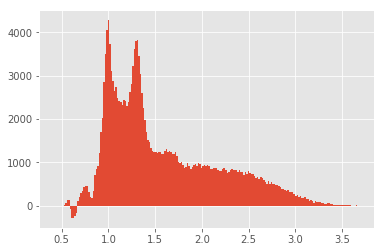

In [294]:
_=plt.hist(data2017.Mpi0eta,weights=data2017.weightASBS,bins=200)

## Plotting all distributions as a function of Mpi0eta

In [297]:
def regionPlot(low,up,iBin):
    condition=(data2017.Mpi0eta<up)&(data2017.Mpi0eta>low)
    fig,axes=plt.subplots(3,4,figsize=(16,11))
    axes=axes.flatten()
    df=data2017
    kws={
        "weights":df.weightASBS,
        "density":True,
        "alpha":0.7
    }

    df=data2017
    cols=["Mpi0eta","Mpi0p","Metap","Mpi0g1","mandelstam_teta","cosTheta_eta_gj","phi_eta_gj",
          "cosTheta_X_cm","phi_X_cm","vanHove_x","vanHove_y","vanHove_omega"]
    binedges=[]
    for col in cols:
        binedges.append(np.histogram(df[col],bins=100)[1])

    for i,col in enumerate(cols):
        _=axes[i].hist(df[col],bins=binedges[i],color="gray",**kws)
        axes[i].set_title(col,size=20)
        if col=="vanHove_omega":
            axes[i].axvline(240,c='red',linestyle="--",alpha=0.5)
            axes[i].axvline(300,c='red',linestyle="--",alpha=0.5)
            
    df=data2017[condition]
    kws={
        "weights":df.weightASBS,
        "density":True,
        "alpha":0.5
    }

    for i,col in enumerate(cols):
        _=axes[i].hist(df[col],bins=binedges[i],color="slateblue",**kws)
        
    my_suptitle = fig.suptitle(str(low)+"<Mpi0eta<"+str(up)+" GeV", fontsize=20, y=0.97)         
        
    fig.savefig("randomStudy/Mpi0etaBin"+str(iBin)+".png", 
                dpi=fig.dpi, bbox_inches='tight',bbox_extra_artists=[my_suptitle])

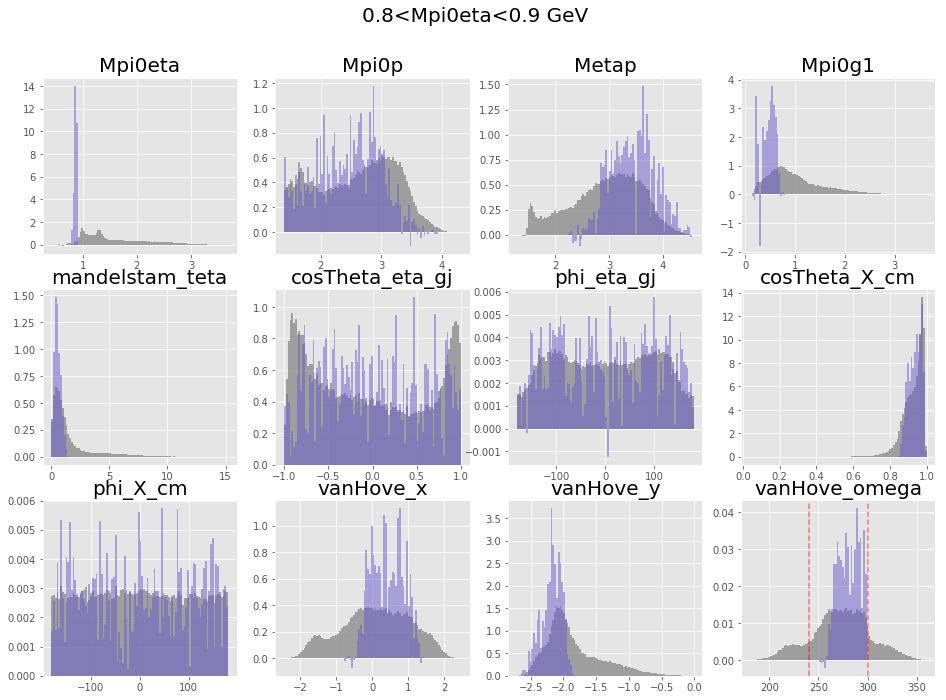

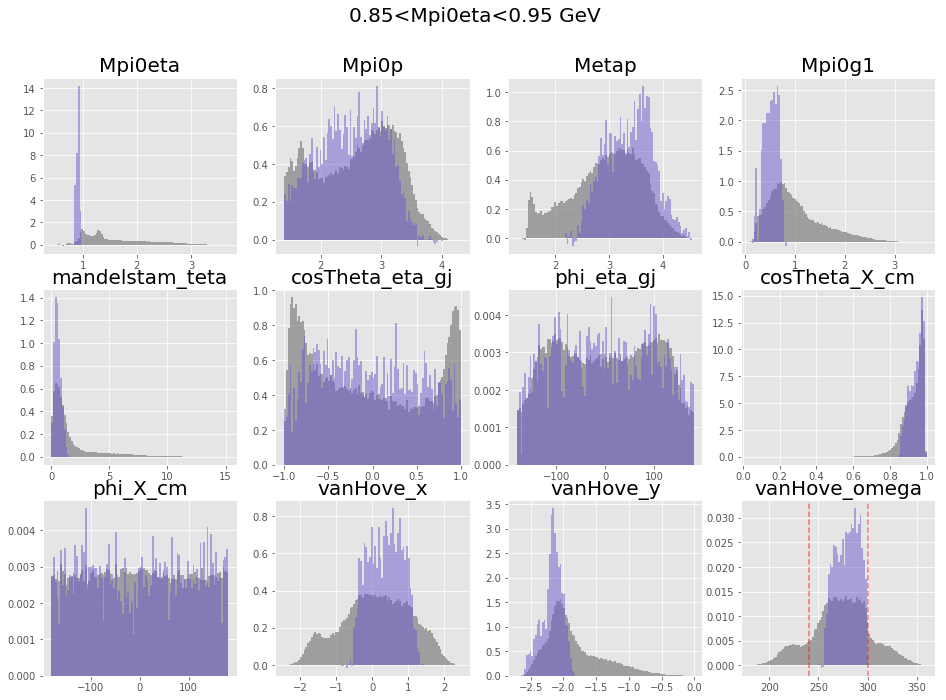

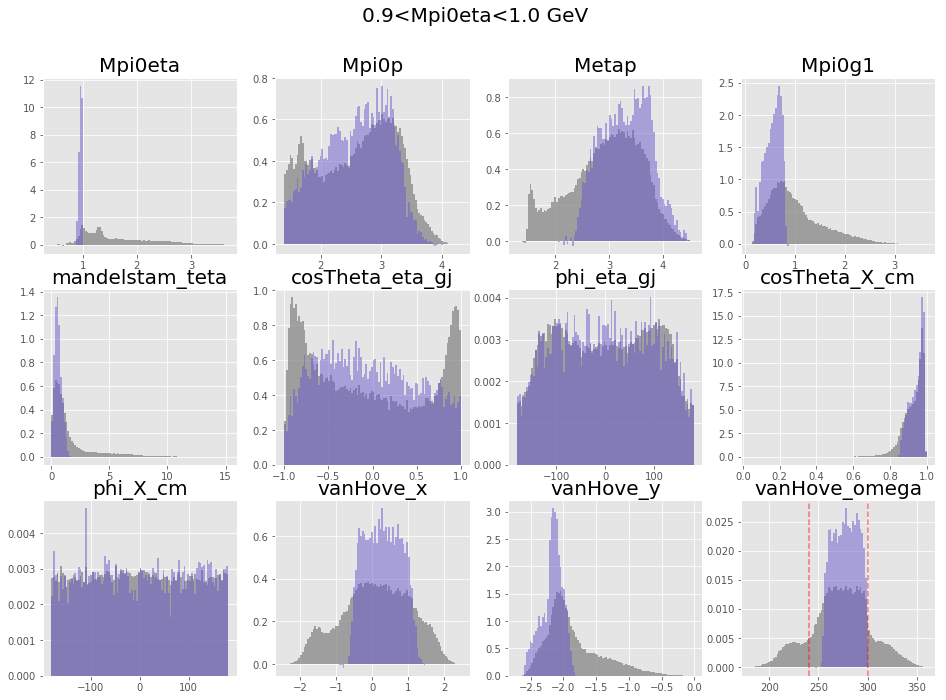

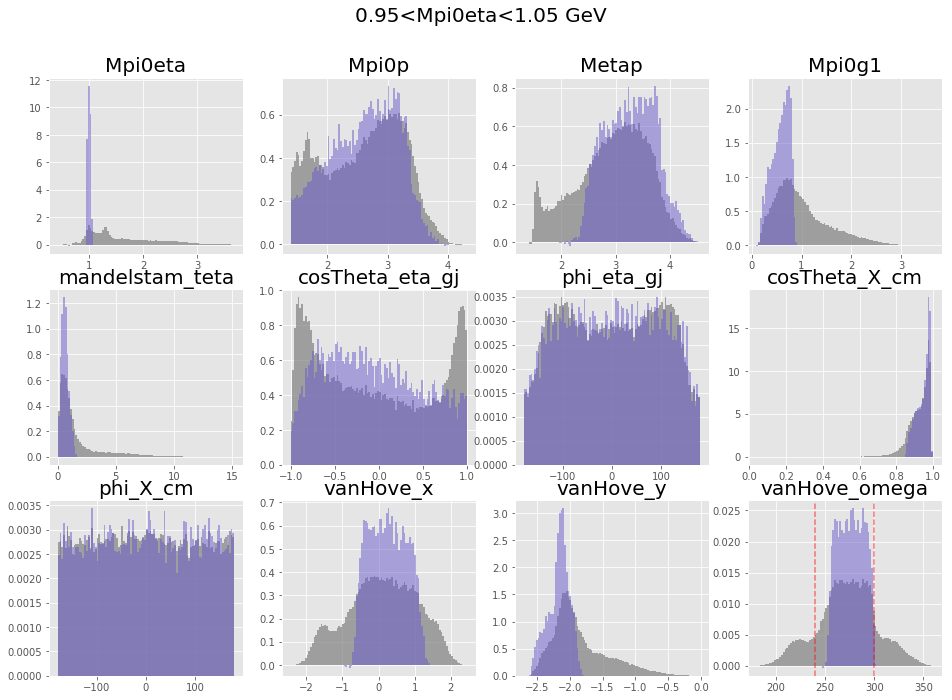

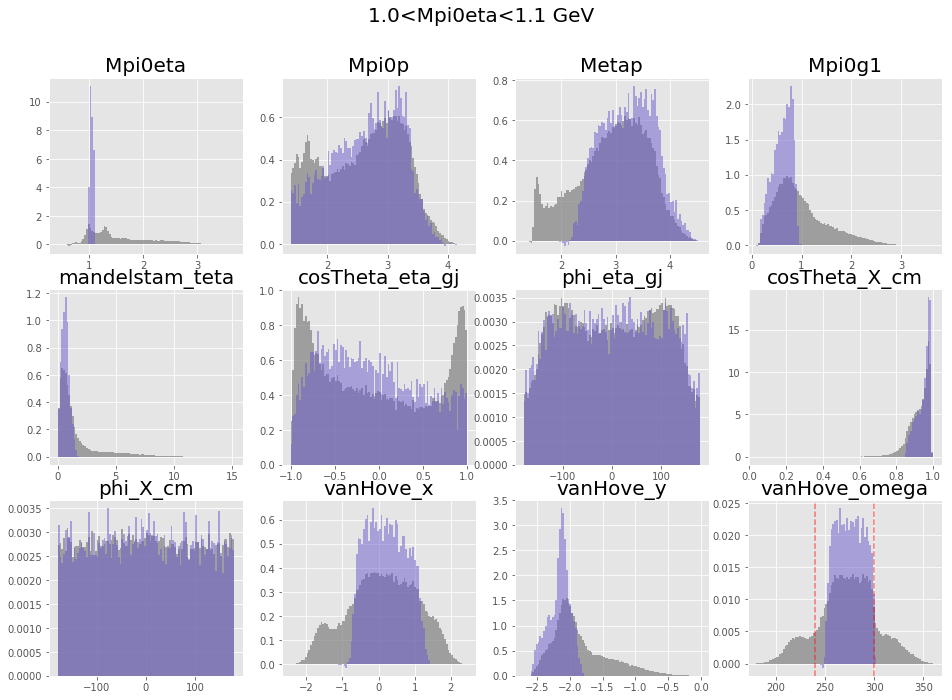

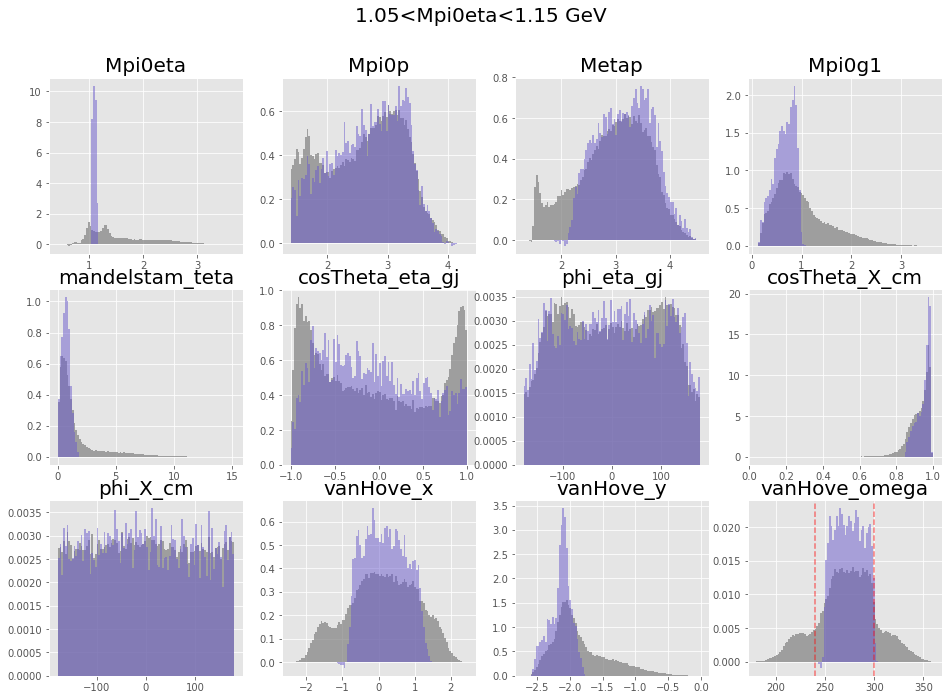

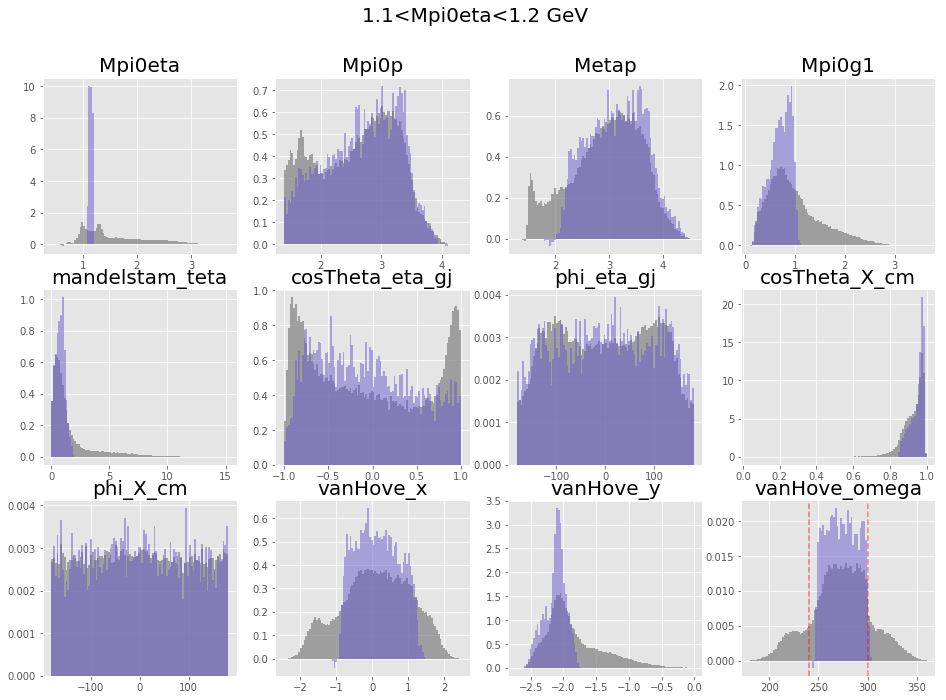

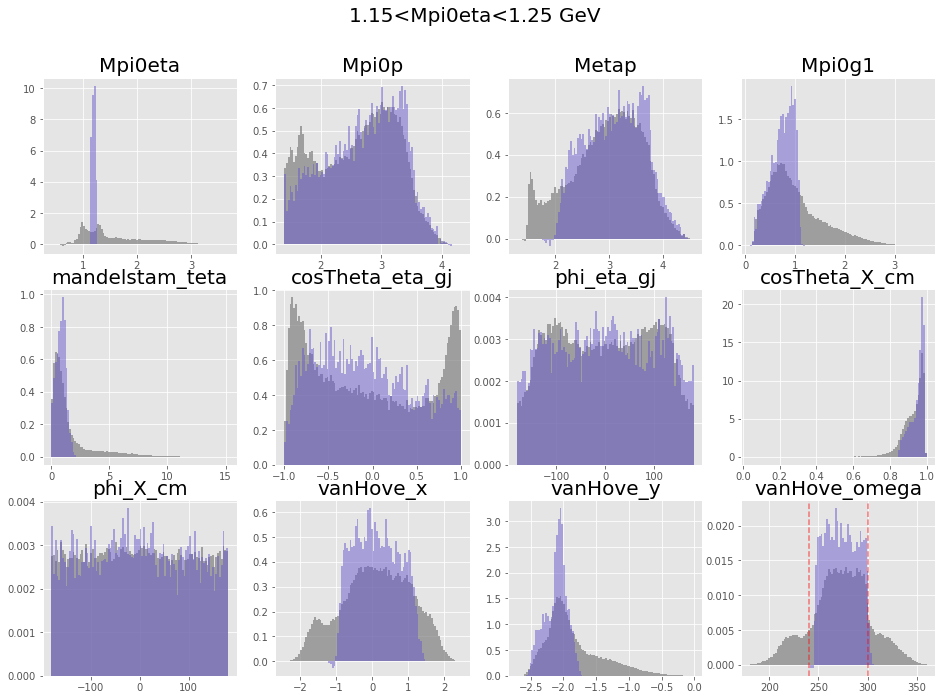

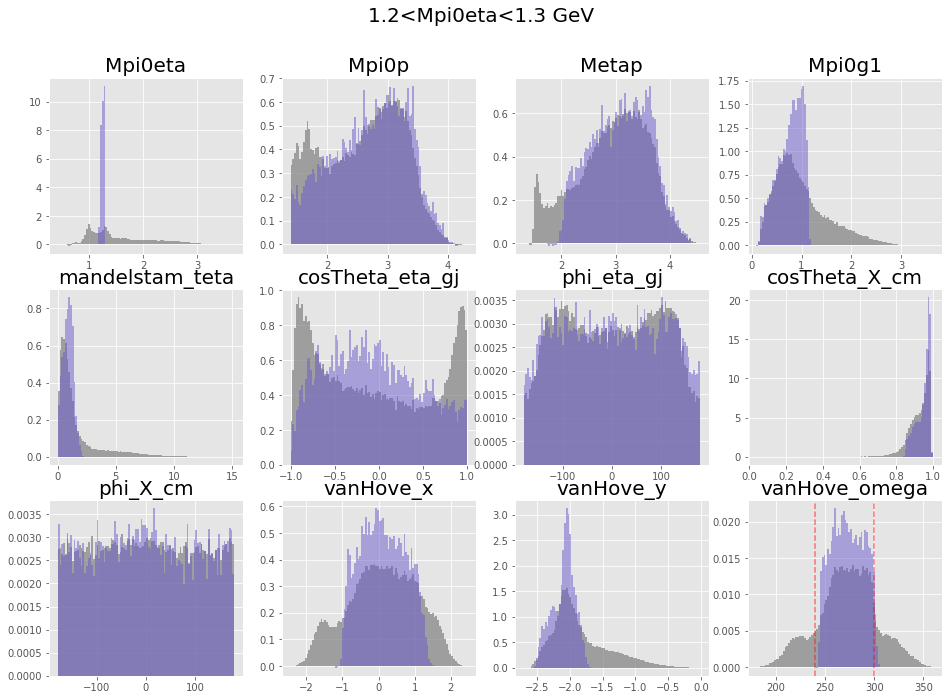

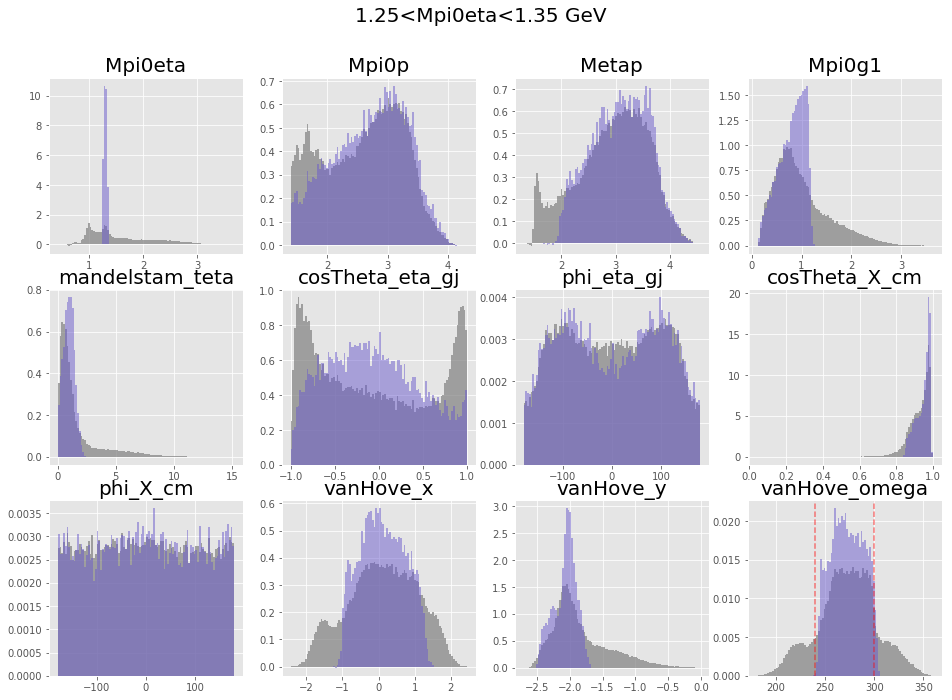

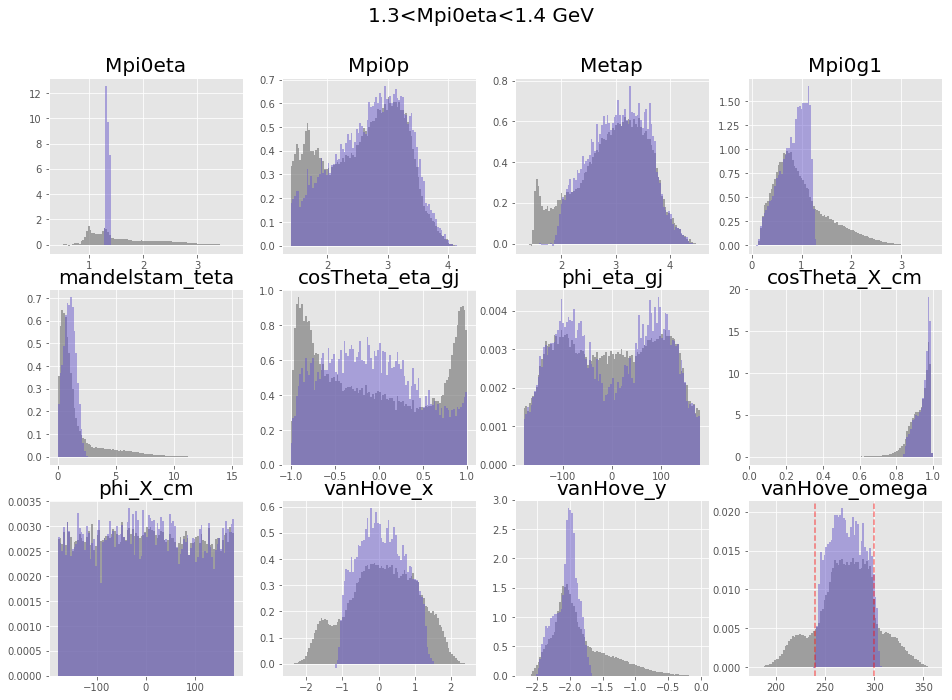

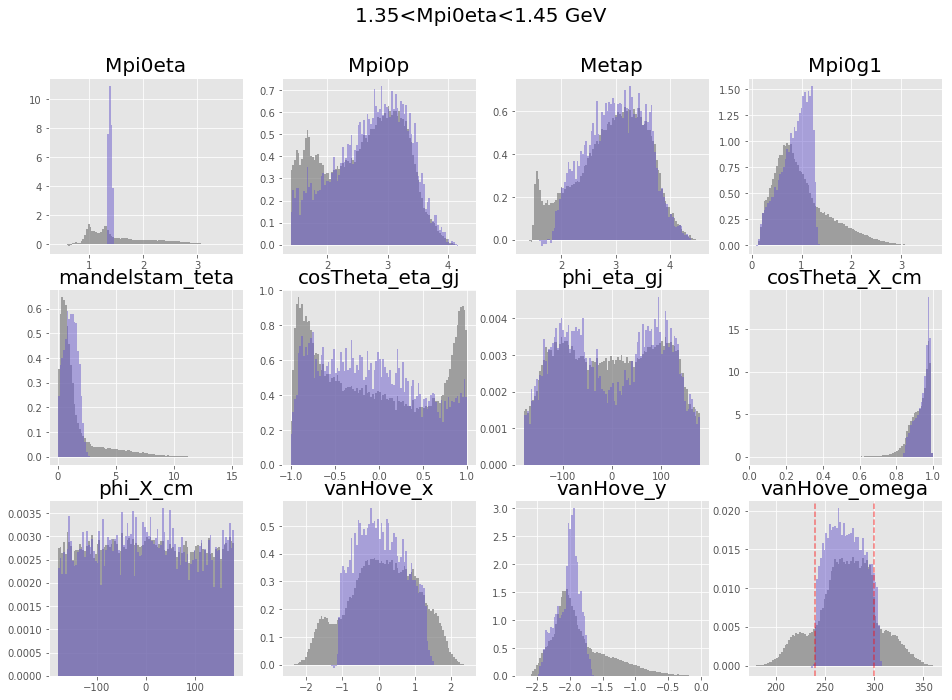

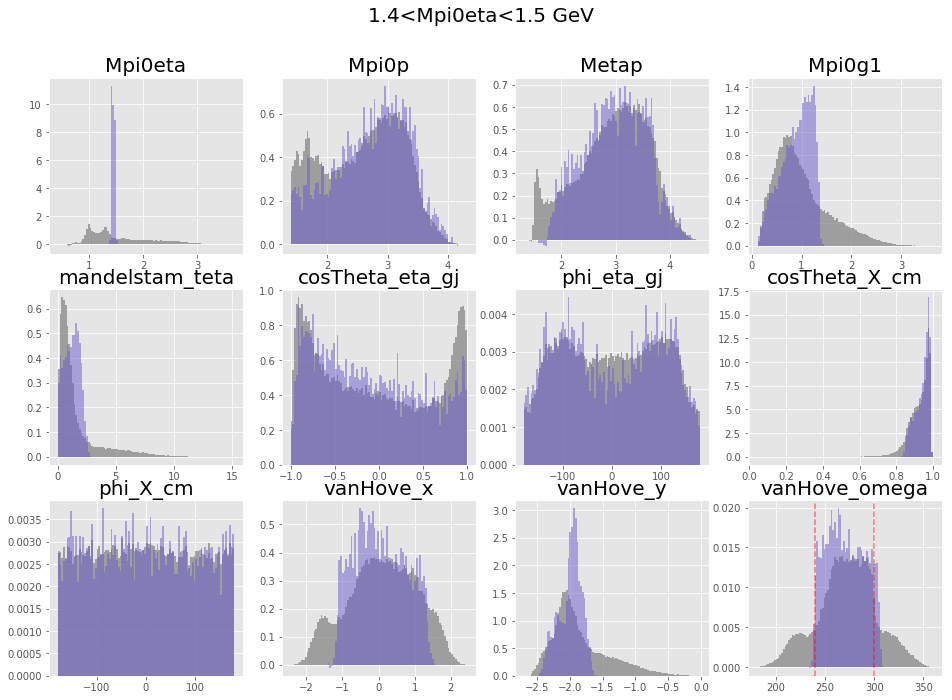

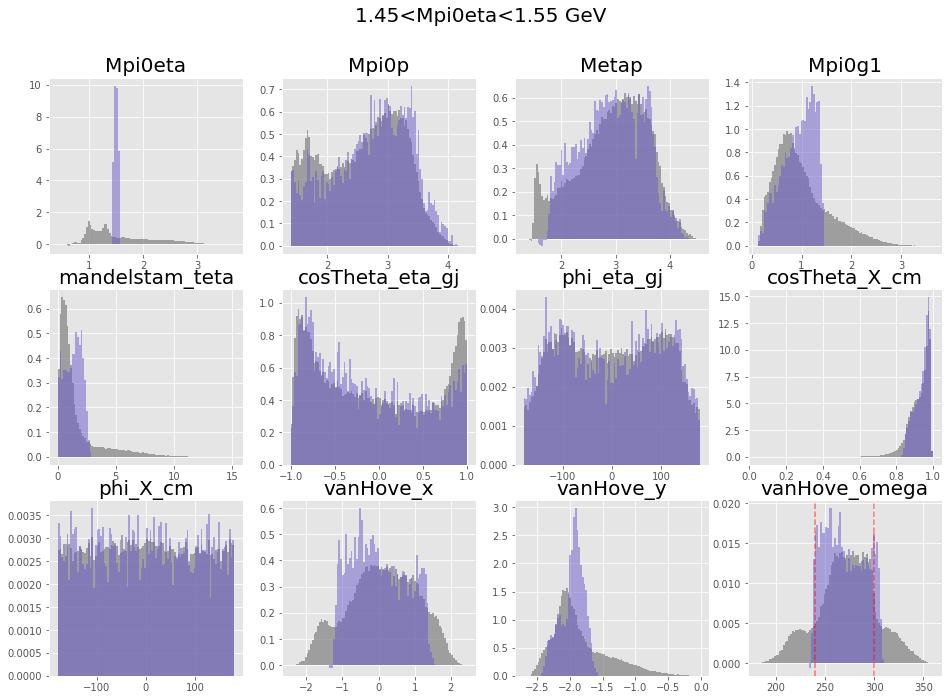

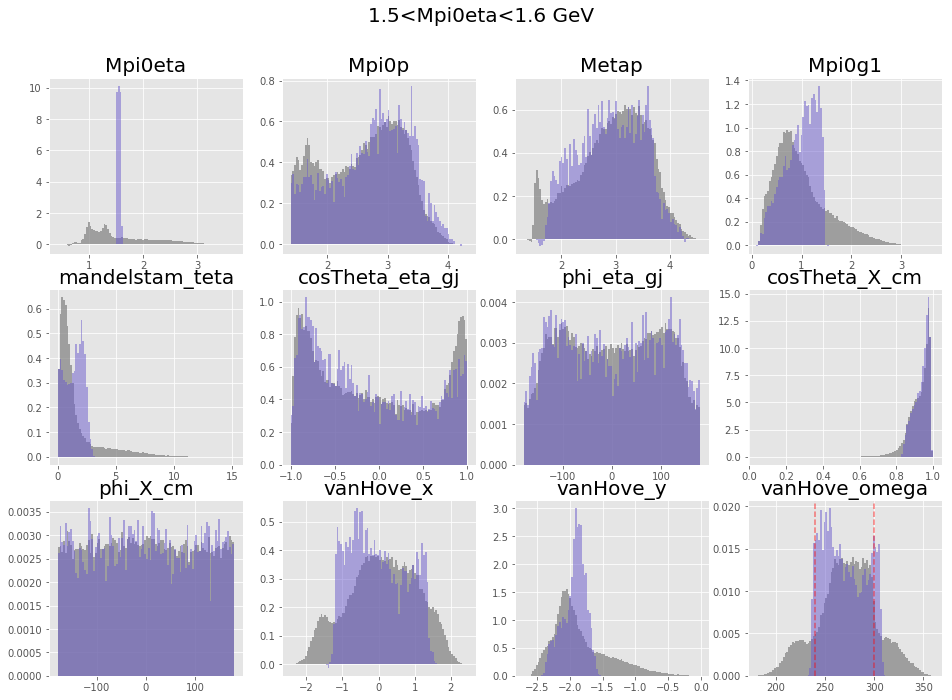

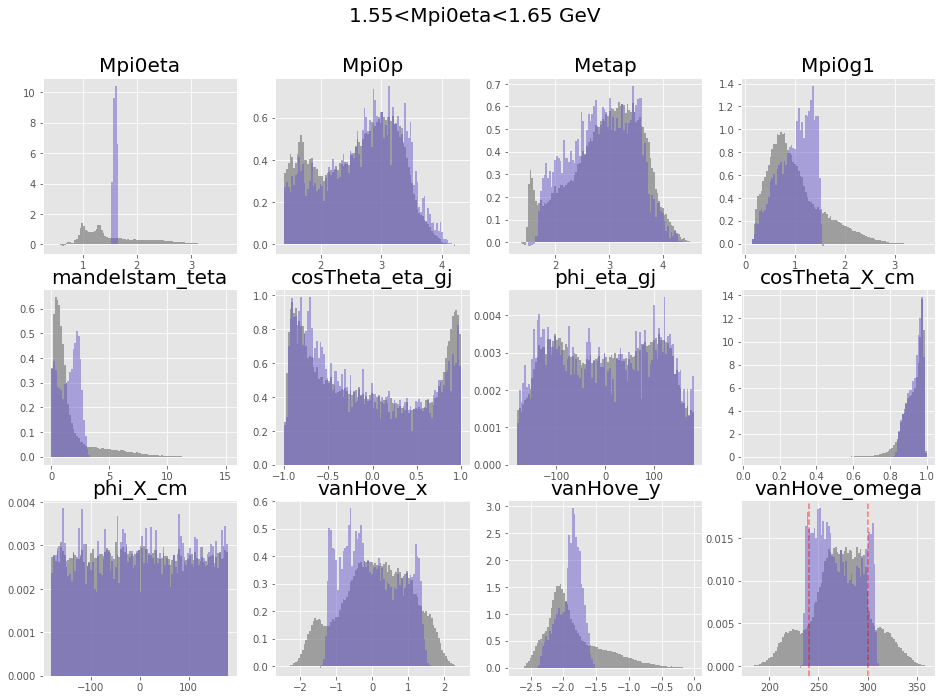

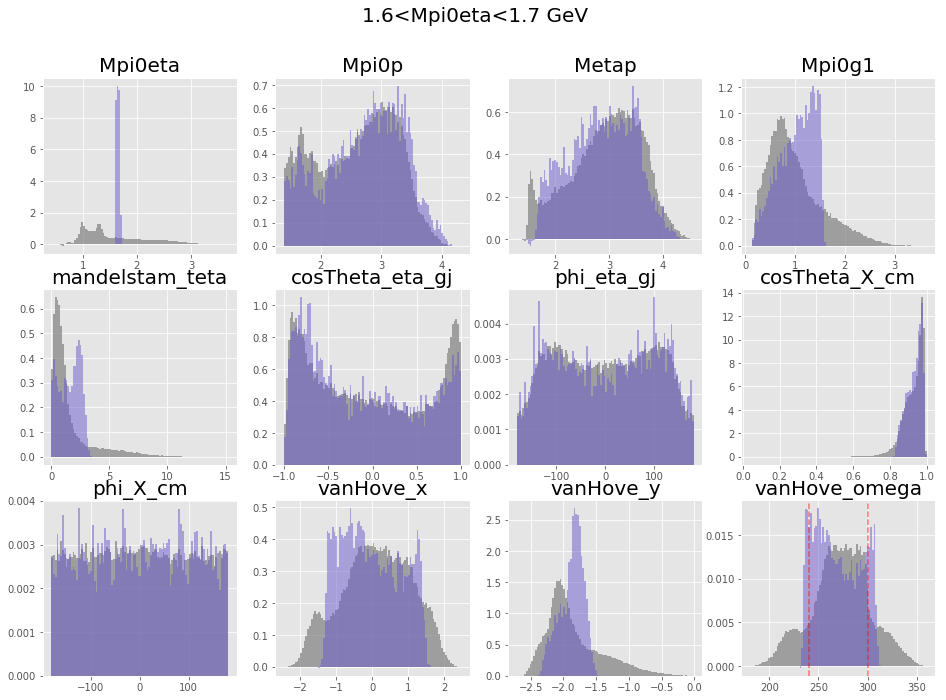

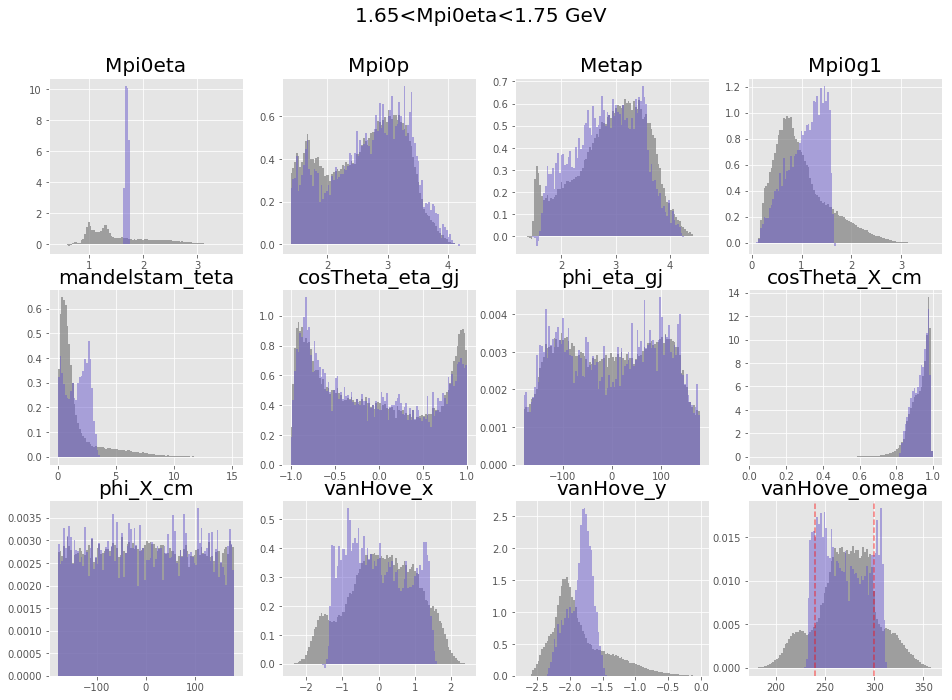

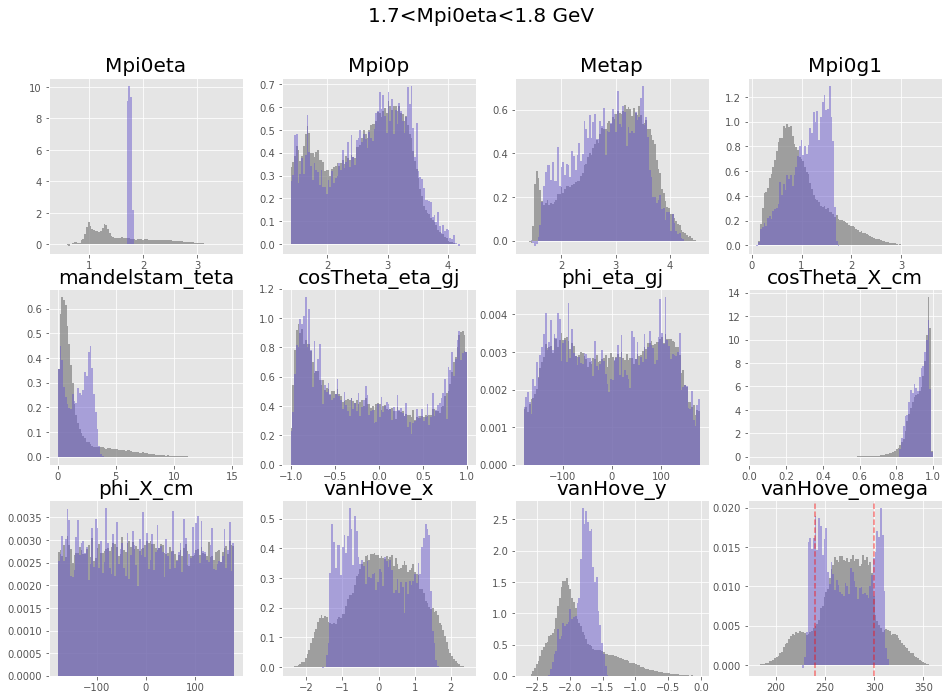

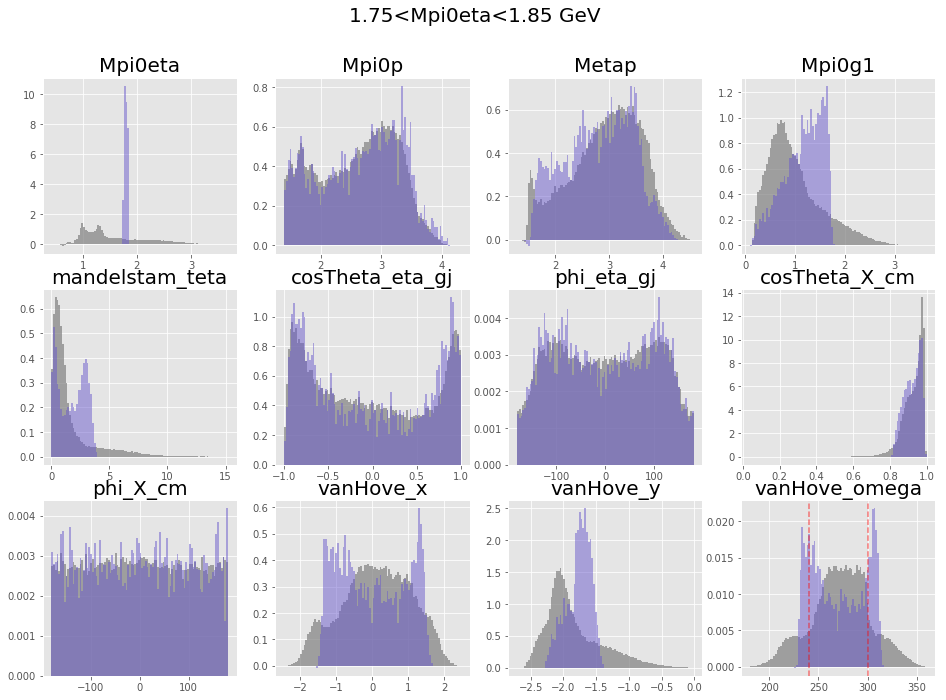

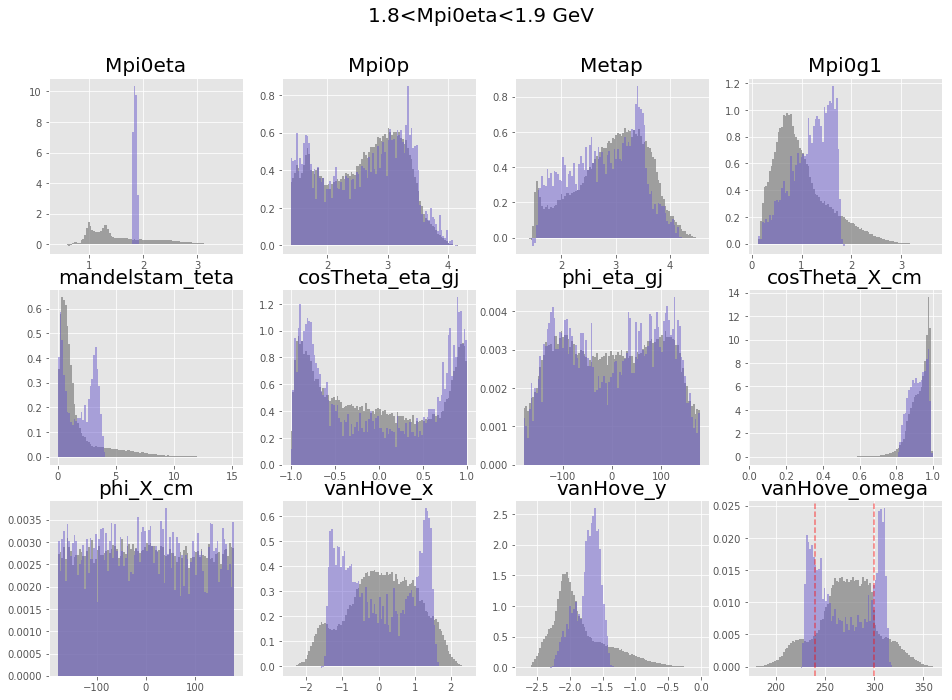

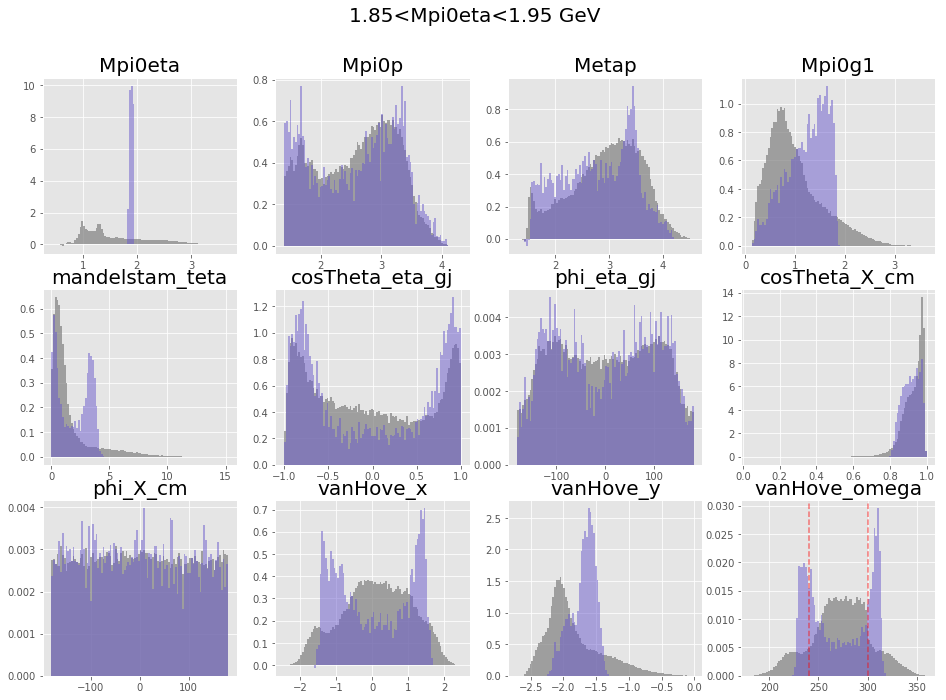

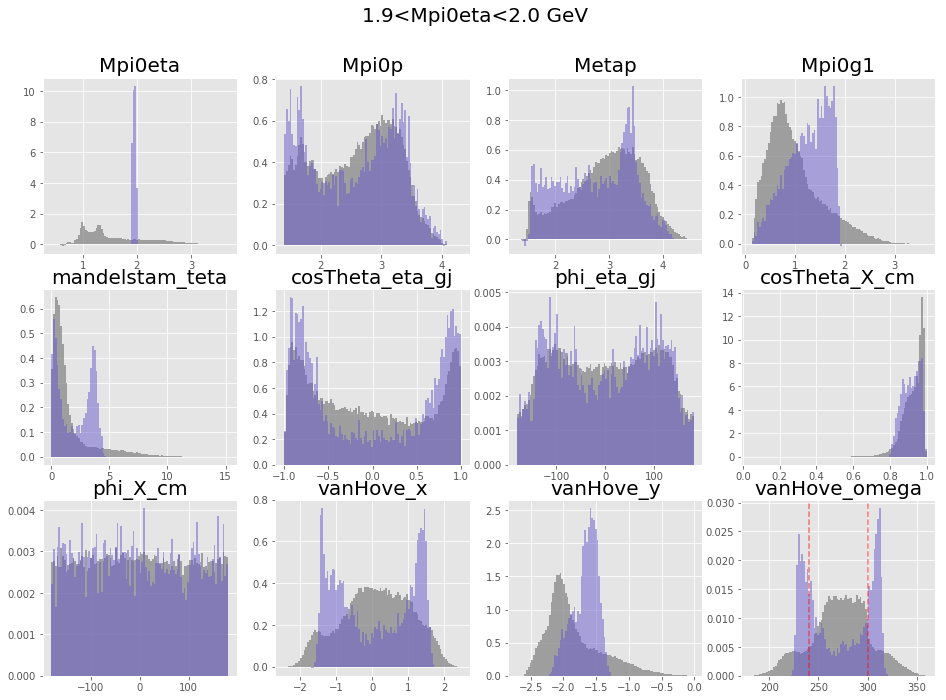

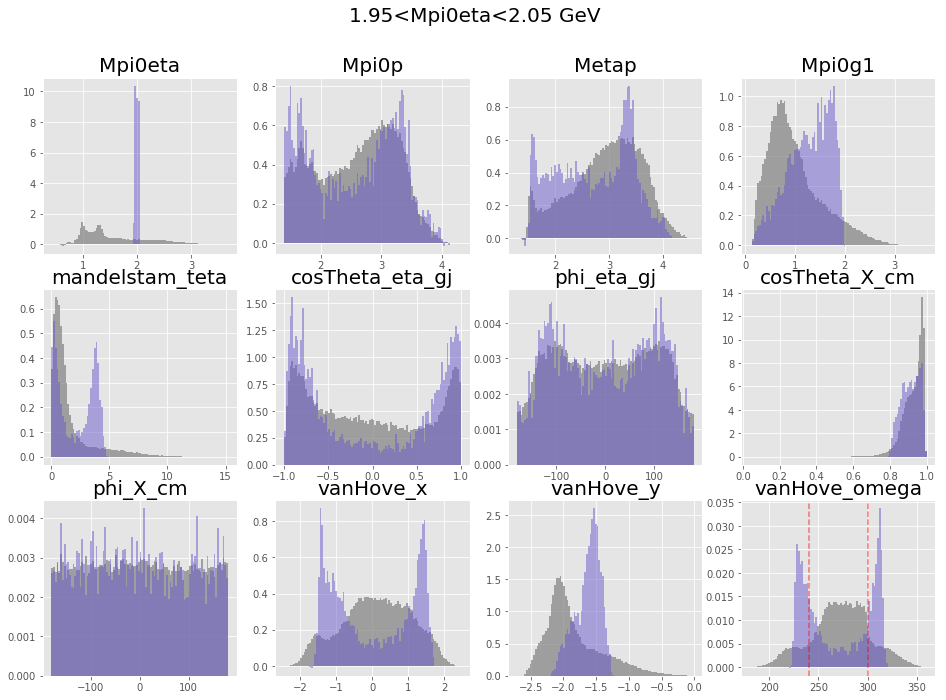

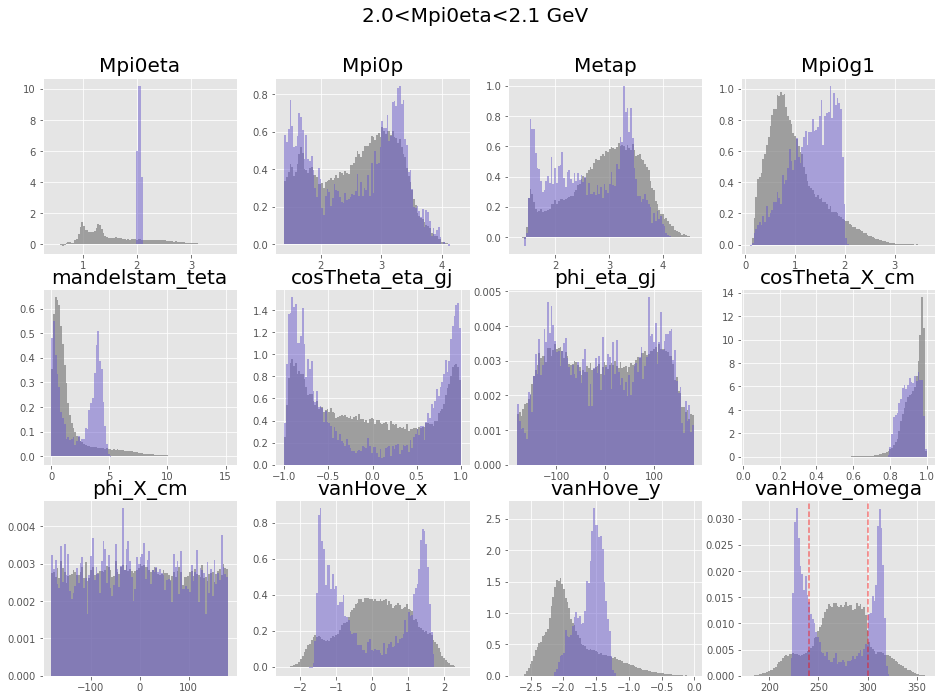

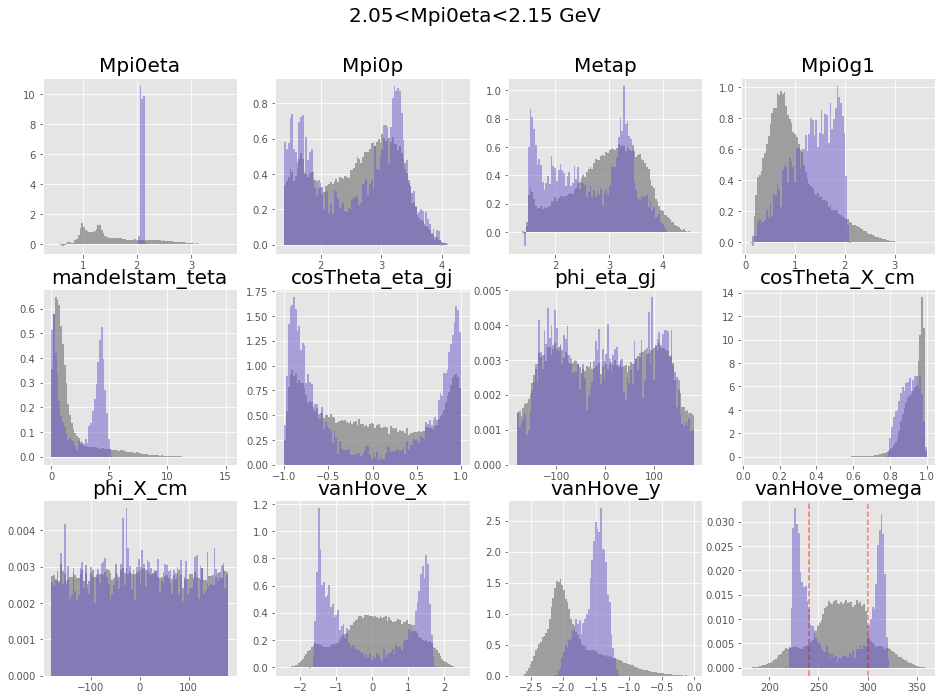

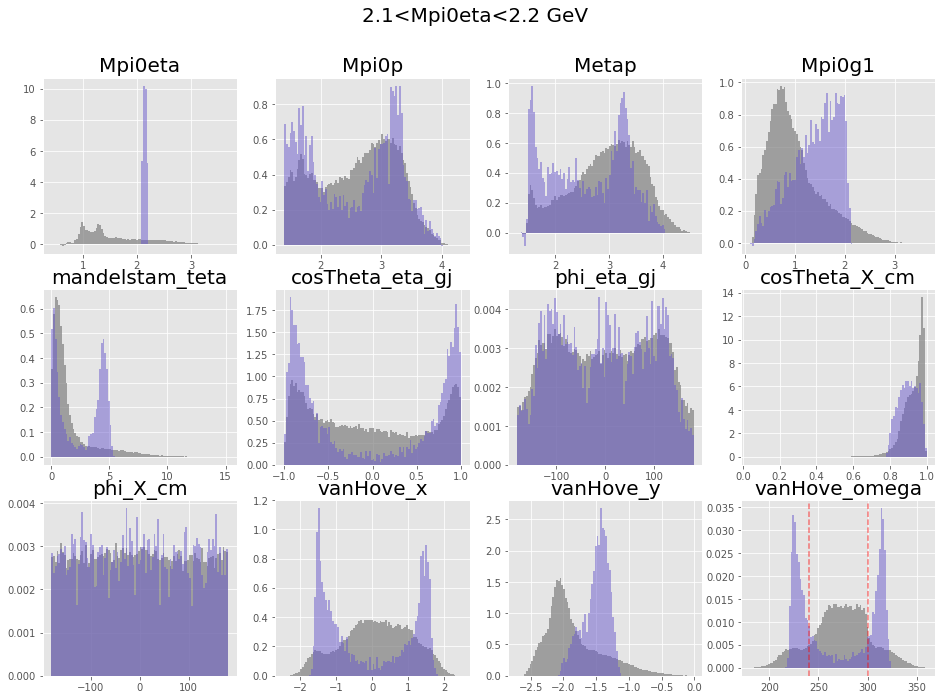

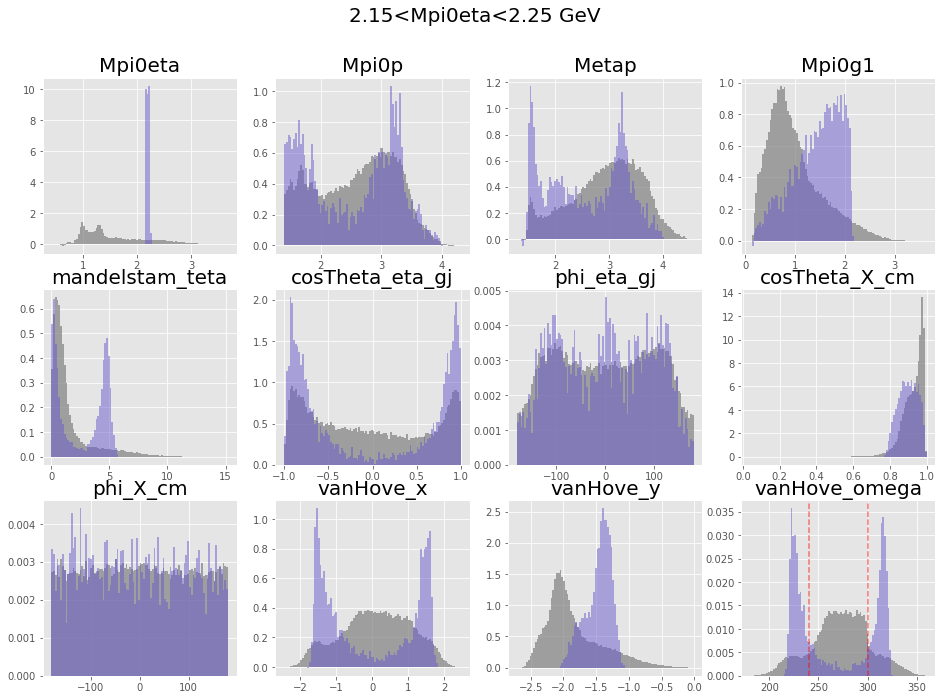

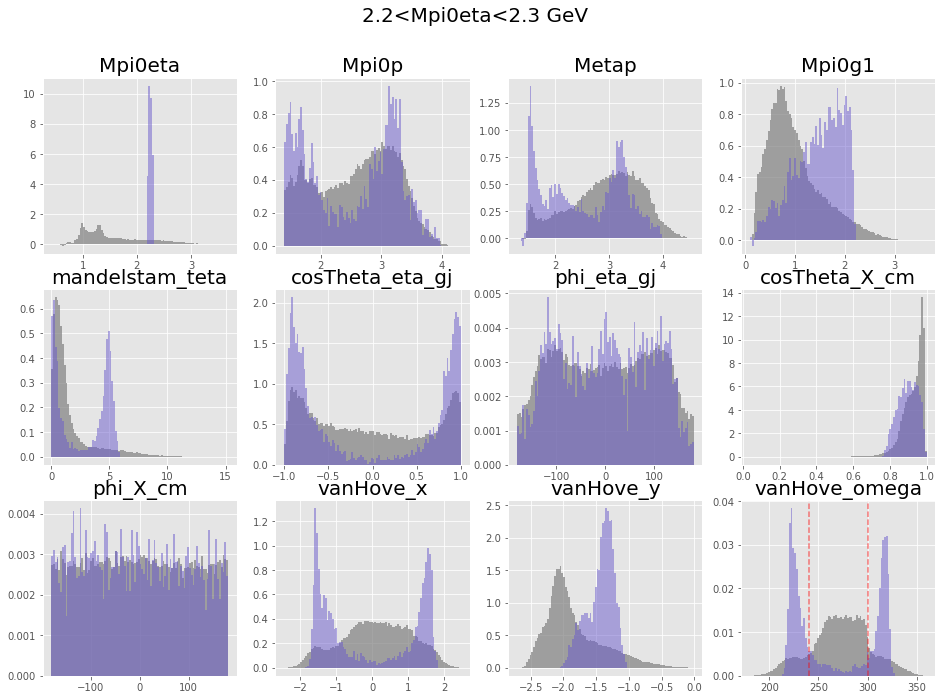

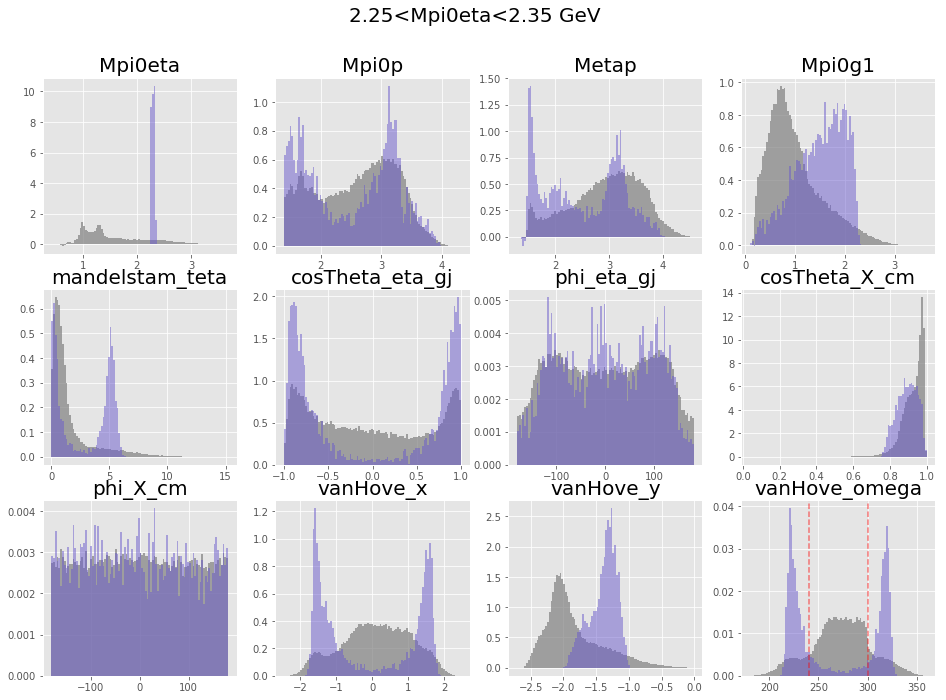

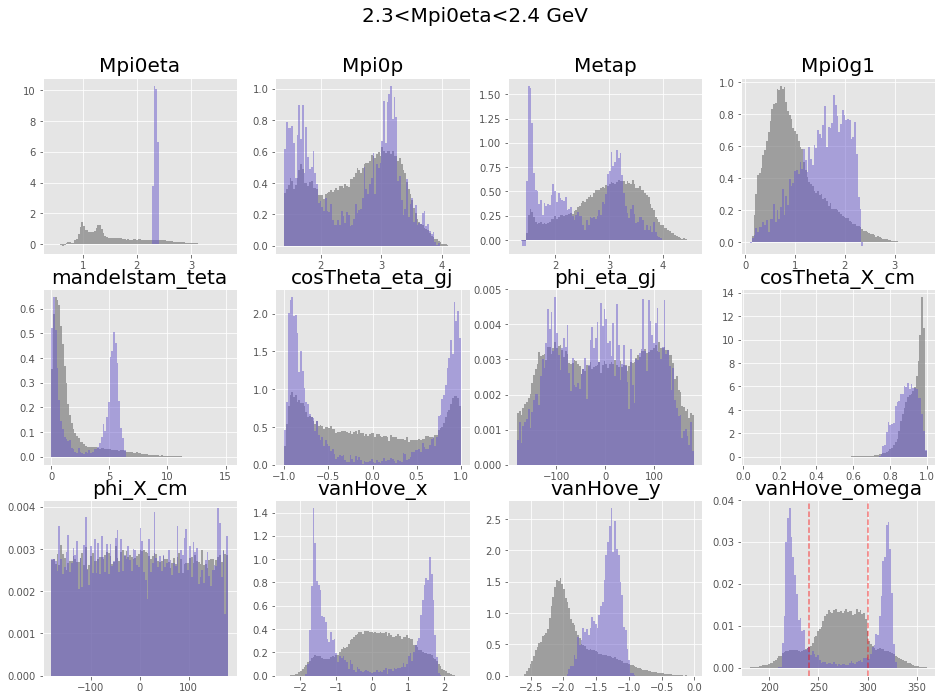

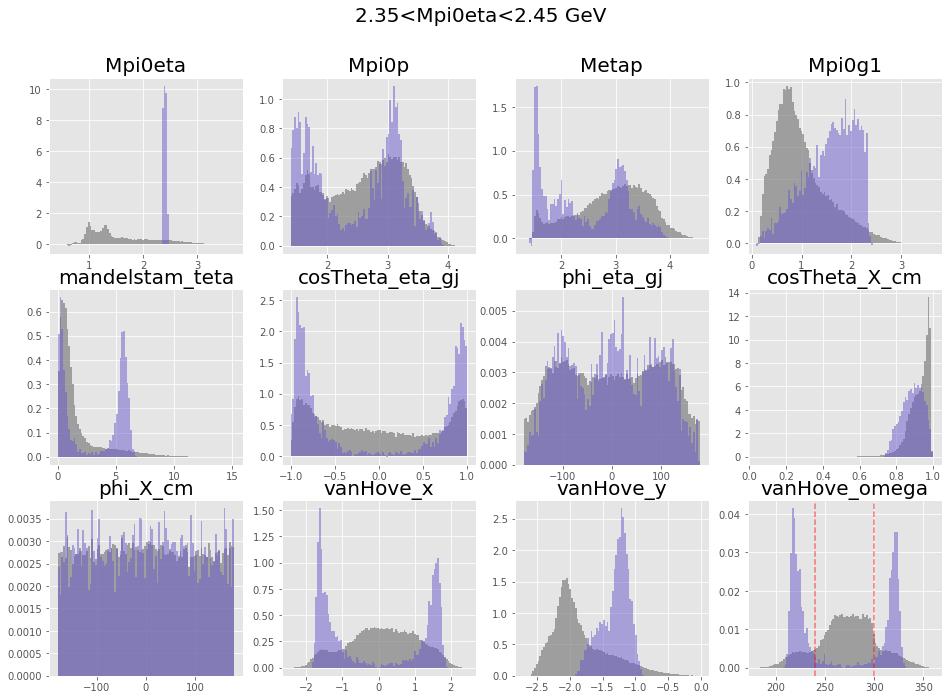

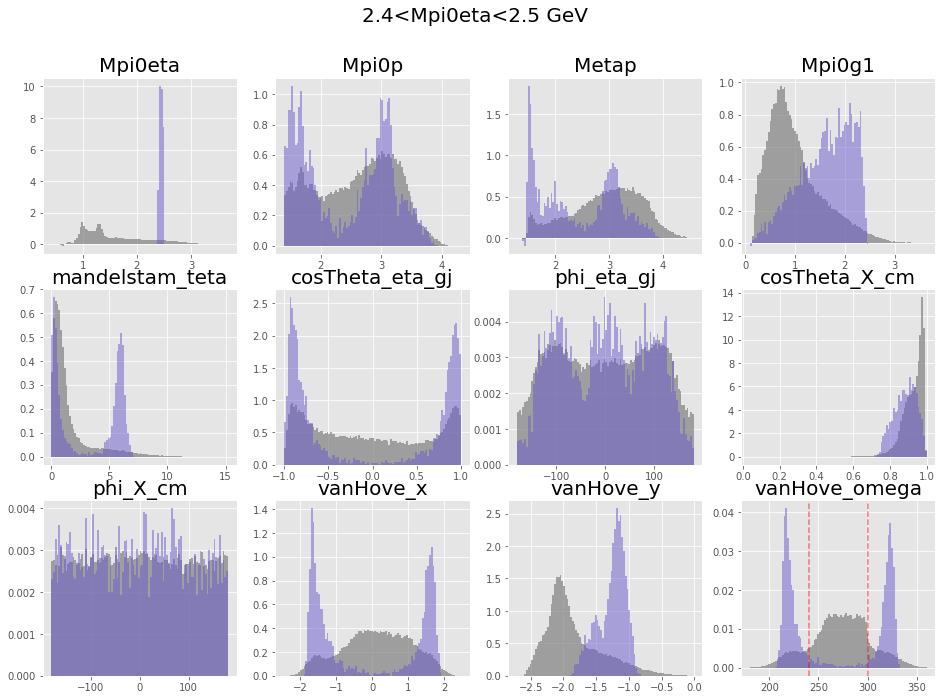

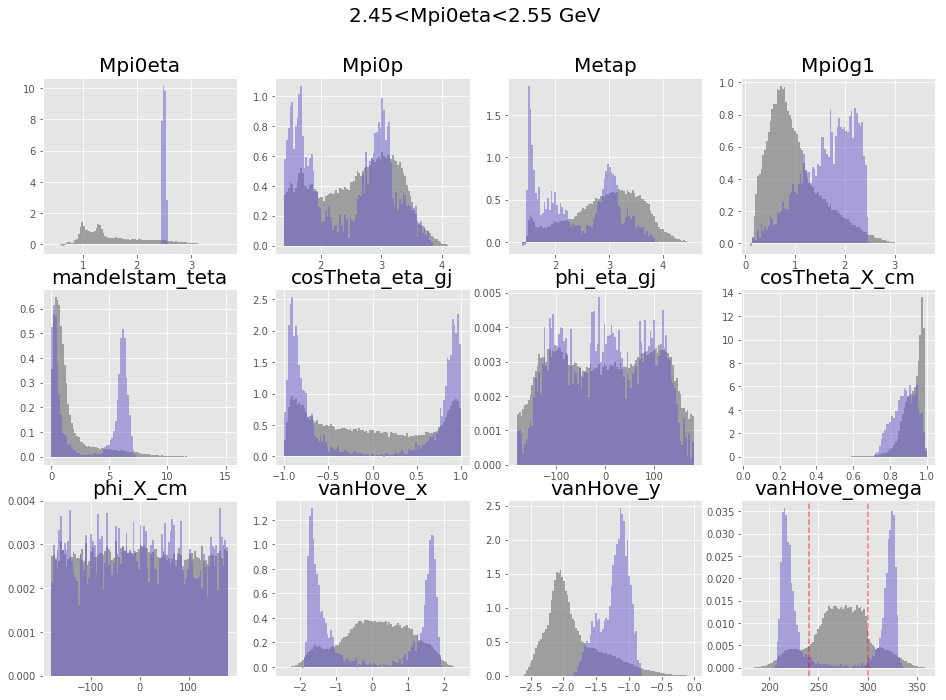

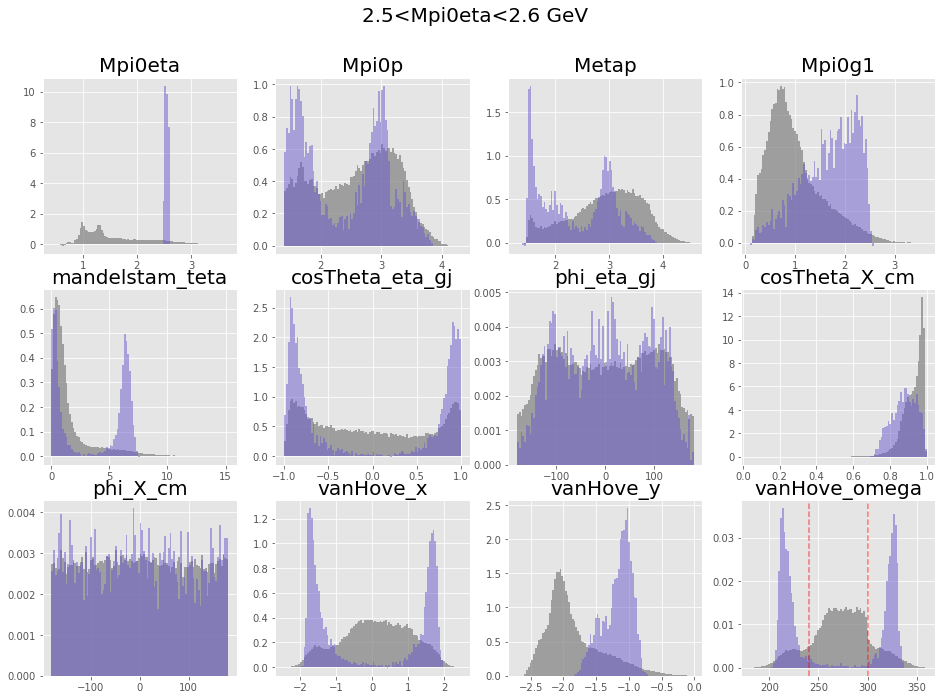

In [299]:
start=0.8
for i in range(35):
    current=start+i*0.05
    regionPlot(current,current+0.1,i)

## Distribution of Effective # of neighbors

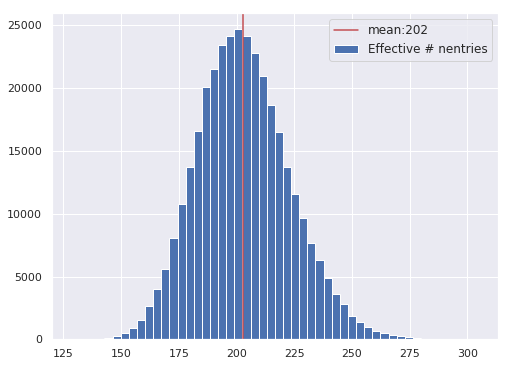

In [54]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.hist(data.eff_nentries,bins=50,label="Effective # nentries")
nentries_mean=data.eff_nentries.mean()
ax.axvline(data.eff_nentries.mean(),c='r',label="mean:"+str(int(nentries_mean)))
ax.legend(prop={"size":12})